# Quantifying Data Distortion

Teng-Jui Lin

- Created: 2023-05-28
- Edited: 2024-06-18

In [1]:
from bar_constants import *
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Control Experiment Bar Graphs

### Control 1

(0.0, 60.0)

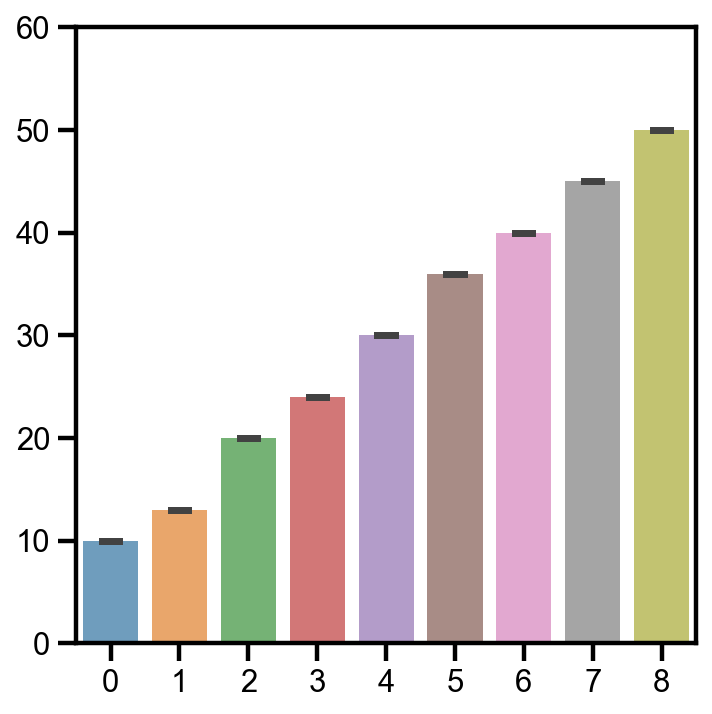

In [2]:
bar_df = pd.DataFrame(np.hstack([
    10 + np.zeros([SAMPLE_SIZE, 1]), 
    13 + np.zeros([SAMPLE_SIZE, 1]), 
    20 + np.zeros([SAMPLE_SIZE, 1]), 
    24 + np.zeros([SAMPLE_SIZE, 1]), 
    30 + np.zeros([SAMPLE_SIZE, 1]), 
    36 + np.zeros([SAMPLE_SIZE, 1]), 
    40 + np.zeros([SAMPLE_SIZE, 1]), 
    45 + np.zeros([SAMPLE_SIZE, 1]), 
    50 + np.zeros([SAMPLE_SIZE, 1]),
]))

fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(
    bar_df,
    errorbar=BAR_ERRORBAR,
    capsize=BAR_CAPSIZE,
    linewidth=BAR_LINEWIDTH,
    edgecolor=BAR_EDGECOLOR,
    alpha=BAR_ALPHA,
    width=BAR_WIDTH,
    ax=ax,
)
# ax.set_box_aspect(2)
ax.set_ylim(0, 60)

In [3]:
def get_size_of_effect(series):
    # get permutations of all items as 2d array
    comb_arr = itertools.permutations(series, 2)
    comb_arr = np.array(list(comb_arr))
    # calculate size of effect for each permutation as series
    effect = np.diff(comb_arr).reshape(-1) / comb_arr[:, 0]
    effect = pd.Series(effect)
    return effect


def _get_lie_factor(viz_series, val_series):
    return get_size_of_effect(viz_series) / get_size_of_effect(val_series)


def get_lie_factor(viz_series, val_series):
    return viz_series / val_series

In [4]:
control1_val_series = pd.Series(np.array([10, 13, 20, 24, 30, 36, 40, 45, 50]))
control1_val_series.name = 'Data Value'
control1_val_series

0    10
1    13
2    20
3    24
4    30
5    36
6    40
7    45
8    50
Name: Data Value, dtype: int64

In [5]:
control1_viz_df = pd.read_csv(os.path.join(DATA_DIR, MISUSED_BAR_DIR, 'control', 'control_fig1.csv'), header=None, index_col=0)
control1_viz_df = control1_viz_df.reset_index(drop=True)
control1_viz_series = control1_viz_df.iloc[:, 0]
control1_viz_series.name = 'Visual Value'
control1_viz_series

0     9.868491
1    12.887194
2    19.898377
3    23.890856
4    29.928263
5    35.868292
6    39.860771
7    44.924403
8    49.890657
Name: Visual Value, dtype: float64

In [6]:
lie_factor_df = _get_lie_factor(control1_viz_series, control1_val_series)

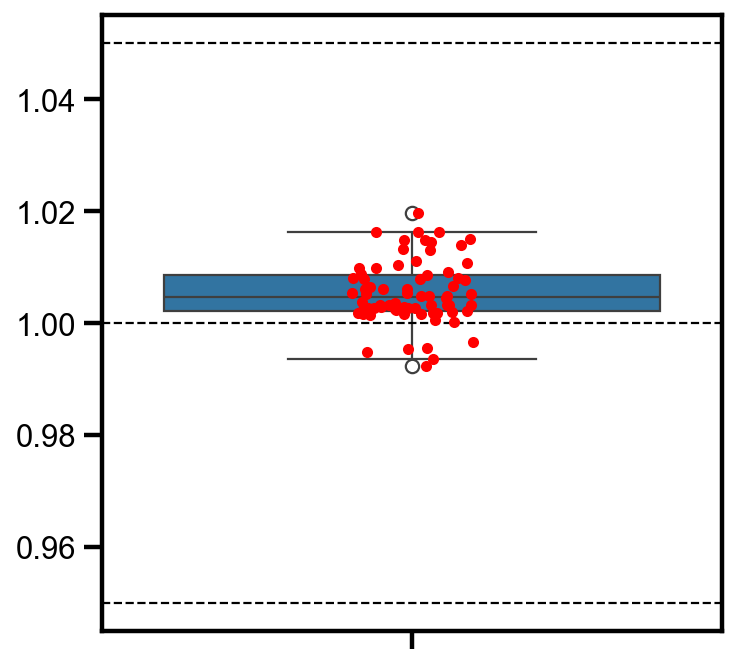

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(
    lie_factor_df,
    ax=ax,
    log_scale=False,
)
sns.stripplot(
    lie_factor_df,
    ax=ax,
    color='r',
)
ax.axhline(1, color='k', ls='--', lw=1)
ax.axhline(1.05, color='k', ls='--', lw=1)
ax.axhline(0.95, color='k', ls='--', lw=1)

(-5.0, 1.5)

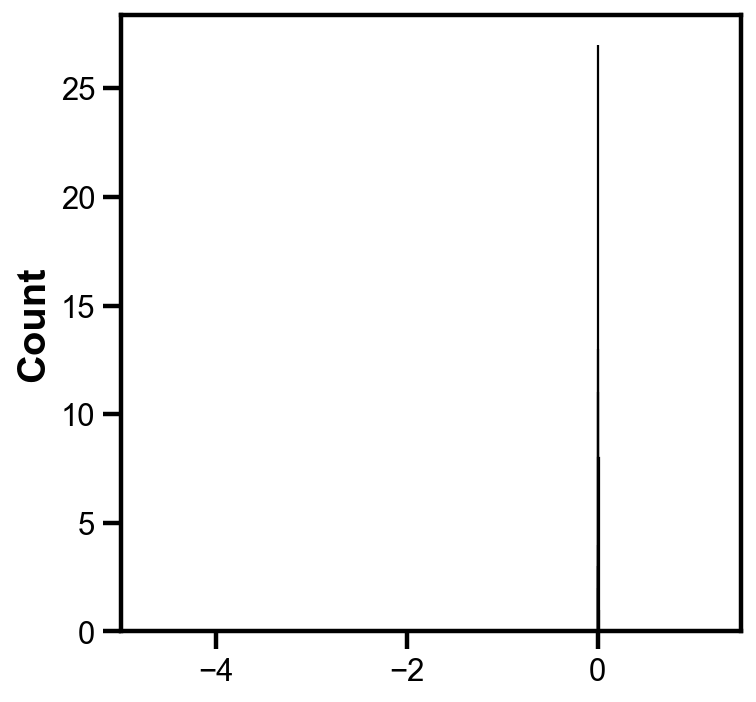

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(
    np.log10(lie_factor_df),
    ax=ax,
)
ax.set_xlim(-5, 1.5)

### Control 2

(0.0, 140.0)

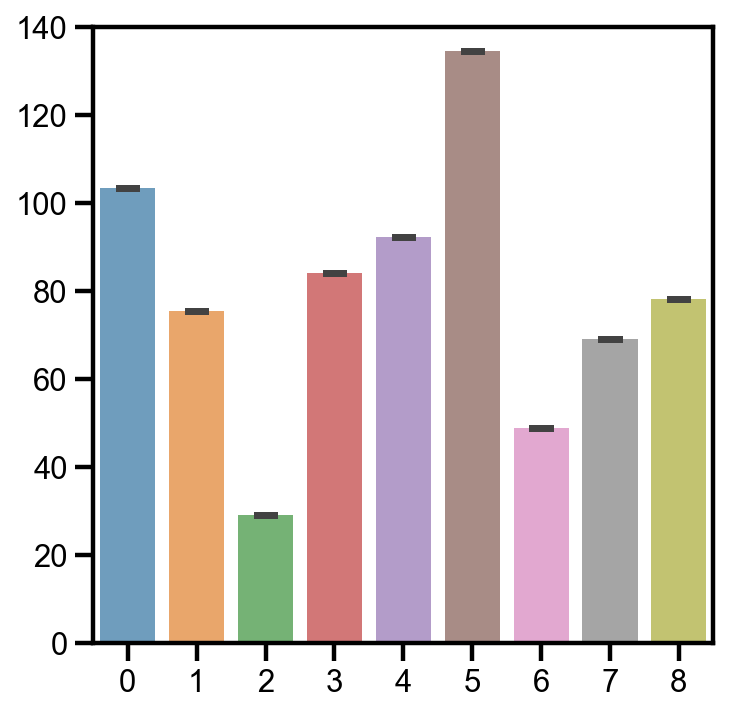

In [9]:
bar_df = pd.DataFrame(np.hstack([
    103.4 + np.zeros([SAMPLE_SIZE, 1]), 
    75.6 + np.zeros([SAMPLE_SIZE, 1]), 
    29.2 + np.zeros([SAMPLE_SIZE, 1]), 
    84.1 + np.zeros([SAMPLE_SIZE, 1]), 
    92.3 + np.zeros([SAMPLE_SIZE, 1]), 
    134.6 + np.zeros([SAMPLE_SIZE, 1]), 
    48.9 + np.zeros([SAMPLE_SIZE, 1]), 
    69.3 + np.zeros([SAMPLE_SIZE, 1]), 
    78.3 + np.zeros([SAMPLE_SIZE, 1]),
]))

fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(
    bar_df,
    errorbar=BAR_ERRORBAR,
    capsize=BAR_CAPSIZE,
    linewidth=BAR_LINEWIDTH,
    edgecolor=BAR_EDGECOLOR,
    alpha=BAR_ALPHA,
    width=BAR_WIDTH,
    ax=ax,
)
# ax.set_box_aspect(2)
ax.set_ylim(0, 140)

In [10]:
control2_val_series = pd.Series(np.array([103.4, 75.6, 29.2, 84.1, 92.3, 134.6, 48.9, 69.3, 78.3]))
control2_val_series.name = 'Data Value'
control2_val_series

0    103.4
1     75.6
2     29.2
3     84.1
4     92.3
5    134.6
6     48.9
7     69.3
8     78.3
Name: Data Value, dtype: float64

In [11]:
control2_viz_df = pd.read_csv(os.path.join(DATA_DIR, MISUSED_BAR_DIR, 'control', 'control_fig2.csv'), header=None, index_col=0)
control2_viz_df = control2_viz_df.reset_index(drop=True)
control2_viz_series = control2_viz_df.iloc[:, 0]
control2_viz_series.name = 'Visual Value'
control2_viz_series

0    103.233107
1     75.285755
2     28.934049
3     83.919896
4     92.099609
5    134.361458
6     48.701688
7     68.923756
8     78.012326
Name: Visual Value, dtype: float64

In [12]:
lie_factor_df = _get_lie_factor(control2_viz_series, control2_val_series)

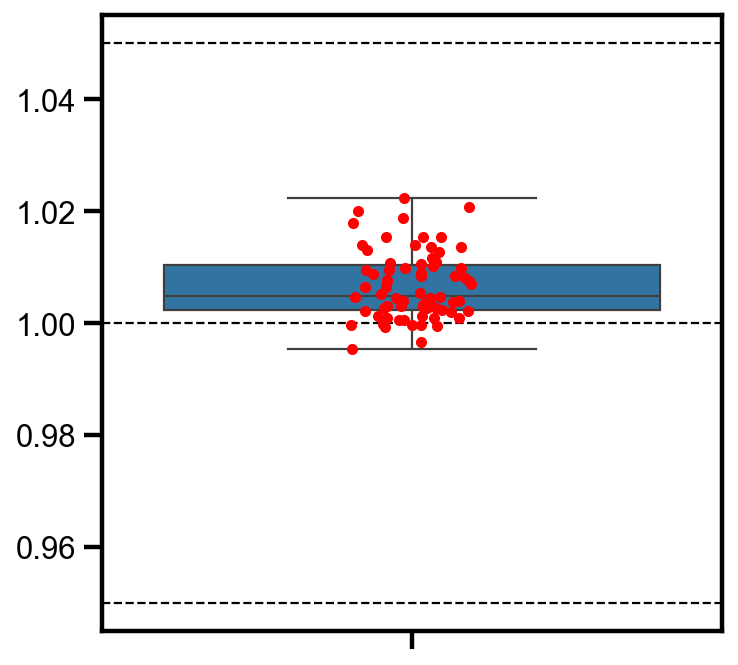

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(
    lie_factor_df,
    ax=ax,
    log_scale=False,
)
sns.stripplot(
    lie_factor_df,
    ax=ax,
    color='r',
)
ax.axhline(1, color='k', ls='--', lw=1)
ax.axhline(1.05, color='k', ls='--', lw=1)
ax.axhline(0.95, color='k', ls='--', lw=1)

(-5.0, 1.5)

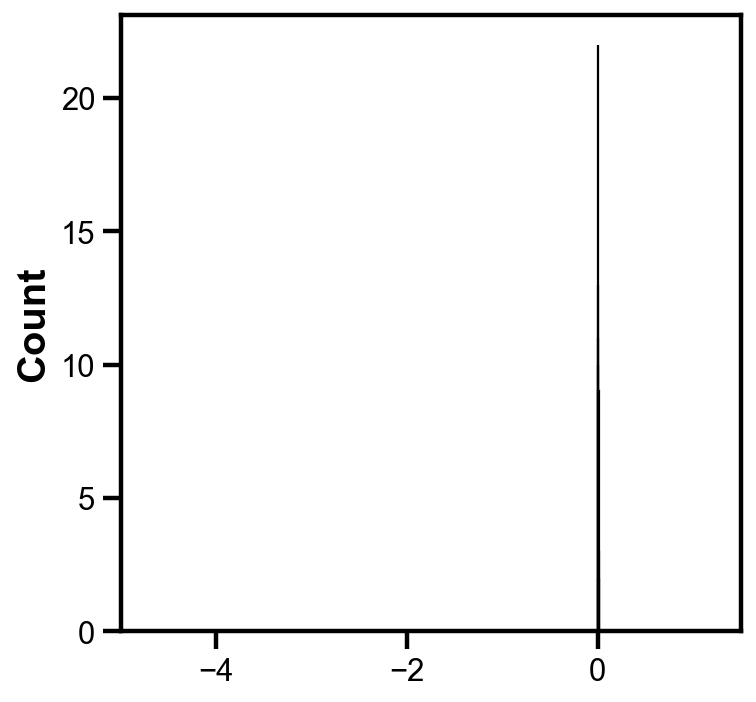

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(
    np.log10(lie_factor_df),
    ax=ax,
)
ax.set_xlim(-5, 1.5)

## Nature Biomedical Engineering

In [15]:
cv = lambda series: series.std() / series.mean()

### Bar-level data

In [16]:
X_LABEL = 'True Value'
Y_LABEL = 'Visualized Value'
ALPHA_MARK_LABEL = 'Mark Proportionality Constant'
ALPHA_DIFF_LABEL = 'Difference Proportionality Constant'

In [17]:
journals = [
    # 'nat_plants',
    # 'nat_biotechnol',
    # 'sci_immunol',
    # 'nature',
    # 'cell',
    # 'nat_cancer',
    # 'sci_transl_med',
    # 'nat_neurosci',
    # 'nat_cell_biol',
    # 'bioeng_transl_med',
    # 'sci_signal',
    # 'nat_nanotechnol',
    'nat_biomed_eng',
]
mistakes = [ZERO_SUBDIR, LOG_SUBDIR]
value_labels = [VAL_LABEL, VIZ_LABEL]
value_label_labels = [X_LABEL, Y_LABEL]

zero_bar_df_list = []
log_bar_df_list = []
for journal in journals:
    mistake_zero_bar_df_list = []
    mistake_log_bar_df_list = []
    for mistake in mistakes:
        for j, value_label in enumerate(value_labels):
            # get filepaths
            filepath = os.path.join(DATA_DIR, MISUSED_BAR_DIR, journal, mistake)
            filenames = os.listdir(filepath)
            filenames = pd.Series(filenames)
            filenames = filenames[filenames.str.contains(CSV_FILEEXT) & filenames.str.contains(value_label)]
            filenames = filenames.reset_index(drop=True)
            fignames = filenames.str.slice(stop=-8)
            fig_fullids = fignames.str.replace('fig', '')
            filepaths = filepath + os.sep + filenames
            # read individual csv
            raw_df_dict = {}
            for i, filepath in enumerate(filepaths):
                bar_df_ = pd.read_csv(filepath, header=None, index_col=0)
                bar_df_ = bar_df_.reset_index(drop=True)
                # bar_df_.columns = [value_label]
                bar_df_.columns = [value_label_labels[j]]
                # add metadata
                doi, _, figid = fig_fullids[i].split('_')
                bar_df_['Journal'] = journal
                bar_df_['DOI'] = doi
                bar_df_['Mistake'] = mistake
                bar_df_['Fig ID'] = figid
                raw_df_dict[fignames[i]] = bar_df_
            
            # construct mistake-level df
            mistake_level_bar_df = pd.concat(raw_df_dict)
            if mistake == ZERO_SUBDIR:
                mistake_zero_bar_df_list.append(mistake_level_bar_df)
            elif mistake == LOG_SUBDIR:
                mistake_log_bar_df_list.append(mistake_level_bar_df)
            else:
                raise ValueError
    # construct journal-level df
    # zero
    journal_zero_bar_df = mistake_zero_bar_df_list[0].copy()
    journal_zero_bar_df[Y_LABEL] = mistake_zero_bar_df_list[1][Y_LABEL]
    journal_zero_bar_df[ALPHA_MARK_LABEL] = journal_zero_bar_df[Y_LABEL] / journal_zero_bar_df[X_LABEL]
    zero_bar_df_list.append(journal_zero_bar_df)
    # log
    journal_log_bar_df = mistake_log_bar_df_list[0].copy()
    journal_log_bar_df[Y_LABEL] = mistake_log_bar_df_list[1][Y_LABEL]
    journal_log_bar_df[ALPHA_MARK_LABEL] = journal_log_bar_df[Y_LABEL] / journal_log_bar_df[X_LABEL]
    log_bar_df_list.append(journal_log_bar_df)

# construct overall df
zero_bar_df = pd.concat(zero_bar_df_list)
log_bar_df = pd.concat(log_bar_df_list)
bar_df = pd.concat([zero_bar_df, log_bar_df])
bar_df

True Value         Journal  \
10.1038:s41551-023-01136-9_zero_fig11 0      6.103846  nat_biomed_eng   
                                      1      7.142308  nat_biomed_eng   
10.1038:s41551-023-01106-1_zero_fig6  0      0.642522  nat_biomed_eng   
                                      1      0.784164  nat_biomed_eng   
10.1038:s41551-023-01134-x_zero_fig4  0      0.570892  nat_biomed_eng   
...                                               ...             ...   
10.1038:s41551-023-01143-w_log_fig1   11  1556.325877  nat_biomed_eng   
                                      12  1537.143957  nat_biomed_eng   
                                      13    20.026995  nat_biomed_eng   
                                      14  4578.067864  nat_biomed_eng   
                                      15  4044.103502  nat_biomed_eng   

                                                                 DOI Mistake  \
10.1038:s41551-023-01136-9_zero_fig11 0   10.1038:s41551-023-01136-9    zero   
                                      1   10.1038:s41551-023-01136-9    zero   
10.1038:s41551-023-01106-1_zero_fig6  0   10.1038:s41551-023-01106-1    zero   
                                      1   10.1038:s41551-023-01106-1    zero   
10.1038:s41551-023-01134-x_zero_fig4  0   10.1038:s41551-023-01134-x    zero   
...                                                              ...     ...   
10.1038:s41551-023-01143-w_log_fig1   11  10.1038:s41551-023-01143-w     log   
                                      12  10.1038:s41551-023-01143-w     log   
                                      13  10.1038:s41551-023-01143-w     log   
                                      14  10.1038:s41551-023-01143-w     log   
                                      15  10.1038:s41551-023-01143-w     log   

                                         Fig ID  Visualized Value  \
10.1038:s41551-023-01136-9_zero_fig11 0      11          0.517308   
                                      1      11          0.690385   
10.1038:s41551-023-01106-1_zero_fig6  0       6          0.737537   
                                      1       6          0.973607   
10.1038:s41551-023-01134-x_zero_fig4  0       4          0.300626   
...                                         ...               ...   
10.1038:s41551-023-01143-w_log_fig1   11      1          0.730700   
                                      12      1          0.728905   
                                      13      1          0.100539   
                                      14      1          0.886894   
                                      15      1          0.868941   

                                          Mark Proportionality Constant  
10.1038:s41551-023-01136-9_zero_fig11 0                        0.084751  
                                      1                        0.096661  
10.1038:s41551-023-01106-1_zero_fig6  0                        1.147878  
                                      1                        1.241586  
10.1038:s41551-023-01134-x_zero_fig4  0                        0.526590  
...                                                                 ...  
10.1038:s41551-023-01143-w_log_fig1   11                       0.000470  
                                      12                       0.000474  
                                      13                       0.005020  
                                      14                       0.000194  
                                      15                       0.000215  

[902 rows x 7 columns]

## Pairwise permutation-level metric

In [18]:
def perm_rel_change(df, label):
    perm_arr = itertools.permutations(df[label].reset_index(drop=True), 2)
    perm_arr = np.array(list(perm_arr))
    rel_change = (perm_arr[:, 1] - perm_arr[:, 0]) / perm_arr[:, 0]
    rel_change = pd.Series(rel_change)
    return pd.DataFrame(perm_arr), rel_change

In [19]:
def perm_rel_change(df, label):
    perm_arr = itertools.permutations(df[label].reset_index(drop=True), 2)
    perm_arr = pd.DataFrame(np.array(list(perm_arr)))
    return perm_arr

In [20]:
L_df_list = []
fig_id = np.unique(bar_df.index.get_level_values(0))
for i in range(len(fig_id)):
    df = bar_df[bar_df.index.get_level_values(0) == fig_id[i]]
    
    # generate permutations and their respective x, y values
    L_df_ = pd.concat(
        [
            perm_rel_change(df, X_LABEL), 
            perm_rel_change(df, Y_LABEL),
        ], 
        axis=1
    )
    L_df_.columns = ['x_1', 'x_2', 'y_1', 'y_2']

    # store bar id
    L_df_[['Bar 1 ID', 'Bar 2 ID']] = perm_rel_change(bar_df[bar_df.index.get_level_values(0) == fig_id[i]].reset_index(), 'level_1')
    
    # compute lie factor of relative change
    L_df_['E_x_12'] = (L_df_['x_1'] - L_df_['x_2']) / L_df_['x_2']
    L_df_['E_y_12'] = (L_df_['y_1'] - L_df_['y_2']) / L_df_['y_2']
    L_df_['L_12'] = L_df_['E_y_12'] / L_df_['E_x_12']
    L_df_['log L_12'] = np.log10(L_df_['L_12'])

    # compute GDI
    L_df_['GDI_12'] = 100 * (L_df_['L_12'] - 1)

    # compute lie factor of fold change
    L_df_['F_12'] = (L_df_['x_1'] / L_df_['x_2']) / (L_df_['y_1'] / L_df_['y_2'])
    L_df_['log F_12'] = np.log10(L_df_['F_12'])

    # compute RGD
    L_df_['RGD_12'] = L_df_['L_12'] - 1

    # store meta data
    L_df_['Journal'] = df['Journal'][0]
    L_df_['DOI'] = df['DOI'][0]
    L_df_['Mistake'] = df['Mistake'][0]
    L_df_['Fig ID'] = df['Fig ID'][0]
    L_df_list.append(L_df_)
L_df = pd.concat(L_df_list, ignore_index=True)
L_df

,x_1,x_2,y_1,y_2,Bar 1 ID,Bar 2 ID,E_x_12,E_y_12,L_12,log L_12,GDI_12,F_12,log F_12,RGD_12,Journal,DOI,Mistake,Fig ID
0,0.972000,0.973333,0.906667,0.911111,0,1,-0.001370,-0.004878,3.560976,0.551569,256.097561,1.003525,0.001528,2.560976,nat_biomed_eng,10.1038:s41551-022-00991-2,zero,1
1,0.972000,0.967111,0.906667,0.890370,0,2,0.005055,0.018303,3.620632,0.558784,262.063228,0.986990,-0.005687,2.620632,nat_biomed_eng,10.1038:s41551-022-00991-2,zero,1
2,0.972000,0.824000,0.906667,0.413333,0,3,0.179612,1.193548,6.645161,0.822506,564.516129,0.537764,-0.269408,5.645161,nat_biomed_eng,10.1038:s41551-022-00991-2,zero,1
3,0.973333,0.972000,0.911111,0.906667,1,0,0.001372,0.004902,3.573529,0.553097,257.352941,0.996487,-0.001528,2.573529,nat_biomed_eng,10.1038:s41551-022-00991-2,zero,1
4,0.973333,0.967111,0.911111,0.890370,1,2,0.006434,0.023295,3.620632,0.558784,262.063228,0.983523,-0.007215,2.620632,nat_biomed_eng,10.1038:s41551-022-00991-2,zero,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13823,0.701205,0.748193,0.402410,0.496386,12,7,-0.062802,-0.189320,3.014563,0.479224,201.456311,1.156065,0.062982,2.014563,nat_biomed_eng,10.1038:s41551-023-01160-9,zero,1
13824,0.701205,0.690361,0.402410,0.380723,12,8,0.015707,0.056962,3.626582,0.559498,262.658228,0.960968,-0.017291,2.626582,nat_biomed_eng,10.1038:s41551-023-01160-9,zero,1
13825,0.701205,0.818072,0.402410,0.636145,12,9,-0.142857,-0.367424,2.571970,0.410266,157.196970,1.355004,0.131941,1.571970,nat_biomed_eng,10.1038:s41551-023-01160-9,zero,1
13826,0.701205,0.656627,0.402410,0.313253,12,10,0.067890,0.284615,4.192308,0.622453,319.230769,0.831292,-0.080247,3.192308,nat_biomed_eng,10.1038:s41551-023-01160-9,zero,1


<Axes: xlabel='log L_12', ylabel='Count'>

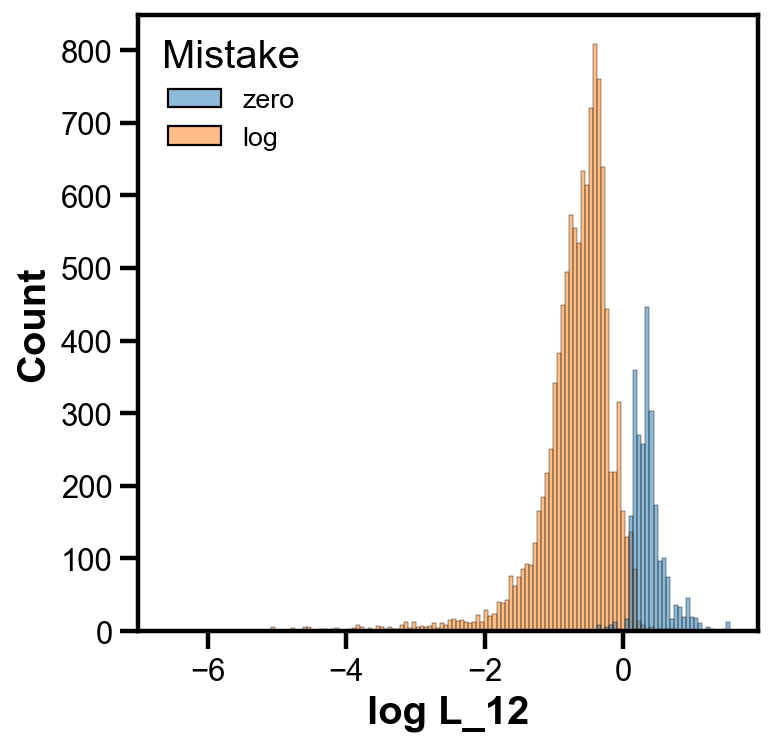

In [21]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(
    L_df, 
    x='log L_12', 
    hue='Mistake', 
    # kde=True,
    ax=ax,
)

<Axes: xlabel='log F_12', ylabel='Count'>

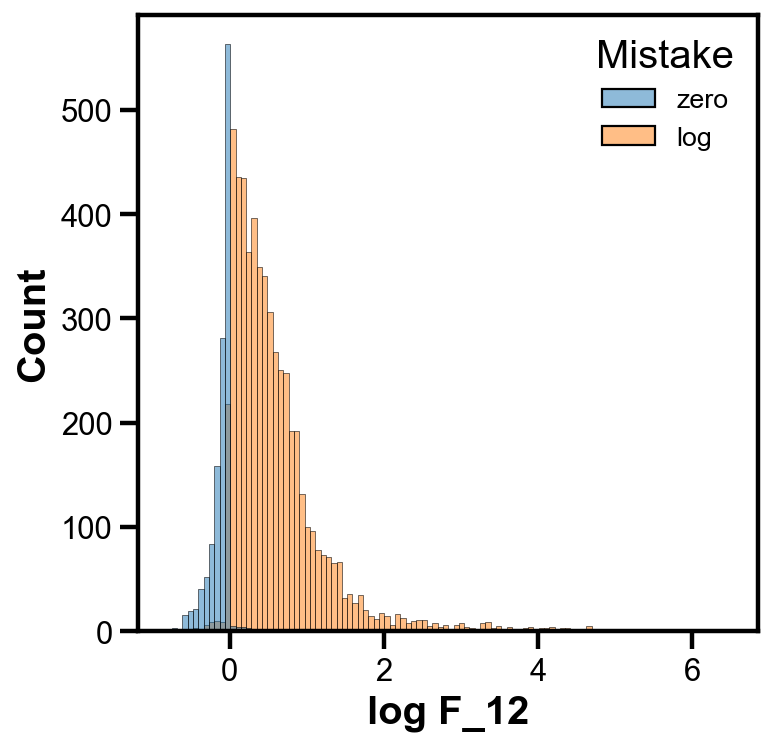

In [22]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(
    L_df[L_df['x_1'] > L_df['x_2']], 
    x='log F_12', 
    hue='Mistake', 
    # kde=True,
    ax=ax,
)

## Graph-level metric

In [23]:
grouped_alpha = (bar_df[ALPHA_MARK_LABEL]).groupby(bar_df.index.get_level_values(0))
grouped_alpha_inverse = (1 / bar_df[ALPHA_MARK_LABEL]).groupby(bar_df.index.get_level_values(0))

In [24]:
cv_df = grouped_alpha.std() / grouped_alpha.mean()
cv_df = cv_df.to_frame()
cv_df.columns = ['CV alpha_i']
cv_df['log CV alpha_i'] = np.log10(cv_df['CV alpha_i'])

cv_df['CV alpha_i inverse'] = grouped_alpha_inverse.std() / grouped_alpha_inverse.mean()
cv_df['log CV alpha_i inverse'] = np.log10(cv_df['CV alpha_i inverse'])

cv_df['Mean CV alpha_i'] = (cv_df['CV alpha_i'] + cv_df['CV alpha_i inverse']) / 2
cv_df['log Mean CV alpha_i'] = np.log10(cv_df['Mean CV alpha_i'])

cv_df['IQR over median alpha_i'] = (grouped_alpha.quantile(0.75) - grouped_alpha.quantile(0.25)) / grouped_alpha.median()
cv_df['log IQR over median alpha_i'] = np.log10(cv_df['IQR over median alpha_i'])

cv_df['IQR over median alpha_i inverse'] = (grouped_alpha_inverse.quantile(0.75) - grouped_alpha_inverse.quantile(0.25)) / grouped_alpha_inverse.median()
cv_df['log IQR over median alpha_i inverse'] = np.log10(cv_df['IQR over median alpha_i inverse'])

cv_df['Mean IQR over median alpha_i'] = (cv_df['IQR over median alpha_i'] + cv_df['IQR over median alpha_i inverse']) / 2
cv_df['log Mean IQR over median alpha_i'] = np.log10(cv_df['Mean IQR over median alpha_i'])

cv_df['MAD alpha_i'] = grouped_alpha.agg(lambda pop: np.median(np.abs(pop - np.median(pop)))) / grouped_alpha.median()
cv_df['log MAD alpha_i'] = np.log10(cv_df['MAD alpha_i'])

cv_df['MAD alpha_i inverse'] = grouped_alpha_inverse.agg(lambda pop: np.median(np.abs(pop - np.median(pop)))) / grouped_alpha_inverse.median()
cv_df['log MAD alpha_i inverse'] = np.log10(cv_df['MAD alpha_i inverse'])

cv_df['Mean MAD alpha_i'] = (cv_df['MAD alpha_i'] + cv_df['MAD alpha_i inverse']) / 2
cv_df['log Mean MAD alpha_i'] = np.log10(cv_df['Mean MAD alpha_i'])

# cv_df = pd.DataFrame(np.abs(np.log10(bar_df[ALPHA_MARK_LABEL]).groupby(bar_df.index.get_level_values(0)).std() / np.log10(bar_df[ALPHA_MARK_LABEL]).groupby(bar_df.index.get_level_values(0)).mean()))

# tag meta data
cv_df['Mistake'] = bar_df.groupby(bar_df.index.get_level_values(0))['Mistake'].unique().str.get(0)
cv_df

,CV alpha_i,log CV alpha_i,CV alpha_i inverse,log CV alpha_i inverse,Mean CV alpha_i,log Mean CV alpha_i,IQR over median alpha_i,log IQR over median alpha_i,IQR over median alpha_i inverse,log IQR over median alpha_i inverse,Mean IQR over median alpha_i,log Mean IQR over median alpha_i,MAD alpha_i,log MAD alpha_i,MAD alpha_i inverse,log MAD alpha_i inverse,Mean MAD alpha_i,log Mean MAD alpha_i,Mistake
10.1038:s41551-022-00991-2_zero_fig1,0.260350,-0.584442,0.351781,-0.453728,0.306066,-0.514185,0.127024,-0.896115,0.224174,-0.649414,0.175599,-0.755478,0.008322,-2.079793,0.008292,-2.081321,0.008307,-2.080556,zero
10.1038:s41551-022-00991-2_zero_fig2,0.134903,-0.869979,0.130595,-0.884072,0.132749,-0.876968,0.122814,-0.910752,0.119076,-0.924174,0.120945,-0.917411,0.077468,-1.110877,0.086396,-1.063506,0.081932,-1.086546,zero
10.1038:s41551-022-01000-2_zero_fig1,0.199067,-0.701001,0.195644,-0.708533,0.197355,-0.704751,0.349495,-0.456559,0.316495,-0.499633,0.332995,-0.477562,0.145547,-0.836997,0.159411,-0.797481,0.152479,-0.816789,zero
10.1038:s41551-022-01000-2_zero_fig2,0.186817,-0.728584,0.236024,-0.627044,0.211420,-0.674853,0.149712,-0.824742,0.162503,-0.789138,0.156108,-0.806576,0.068138,-1.166612,0.063791,-1.195239,0.065965,-1.180690,zero
10.1038:s41551-022-01000-2_zero_fig3,0.310437,-0.508027,0.403494,-0.394163,0.356965,-0.447374,0.399249,-0.398756,0.481782,-0.317149,0.440516,-0.356038,0.208248,-0.681420,0.173203,-0.761445,0.190725,-0.719592,zero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.1038:s41551-023-01143-w_log_fig7,0.701109,-0.154214,1.047439,0.020129,0.874274,-0.058353,0.877428,-0.056788,2.734392,0.436861,1.805910,0.256696,0.722225,-0.141327,0.447149,-0.349548,0.584687,-0.233077,log
10.1038:s41551-023-01146-7_log_fig1,1.864564,0.270577,1.296821,0.112880,1.580693,0.198847,10.761572,1.031876,2.347419,0.370591,6.554495,0.816539,0.839900,-0.075772,0.877558,-0.056724,0.858729,-0.066144,log
10.1038:s41551-023-01146-7_log_fig2,1.818594,0.259736,0.830951,-0.080425,1.324772,0.122141,9.001786,0.954329,1.069939,0.029359,5.035863,0.702074,0.477952,-0.320616,0.559302,-0.252353,0.518627,-0.285145,log
10.1038:s41551-023-01153-8_zero_fig1,0.395117,-0.403274,0.796534,-0.098795,0.595826,-0.224881,0.157574,-0.802515,0.186367,-0.729630,0.171971,-0.764545,0.019500,-1.709964,0.019127,-1.718351,0.019314,-1.714137,zero


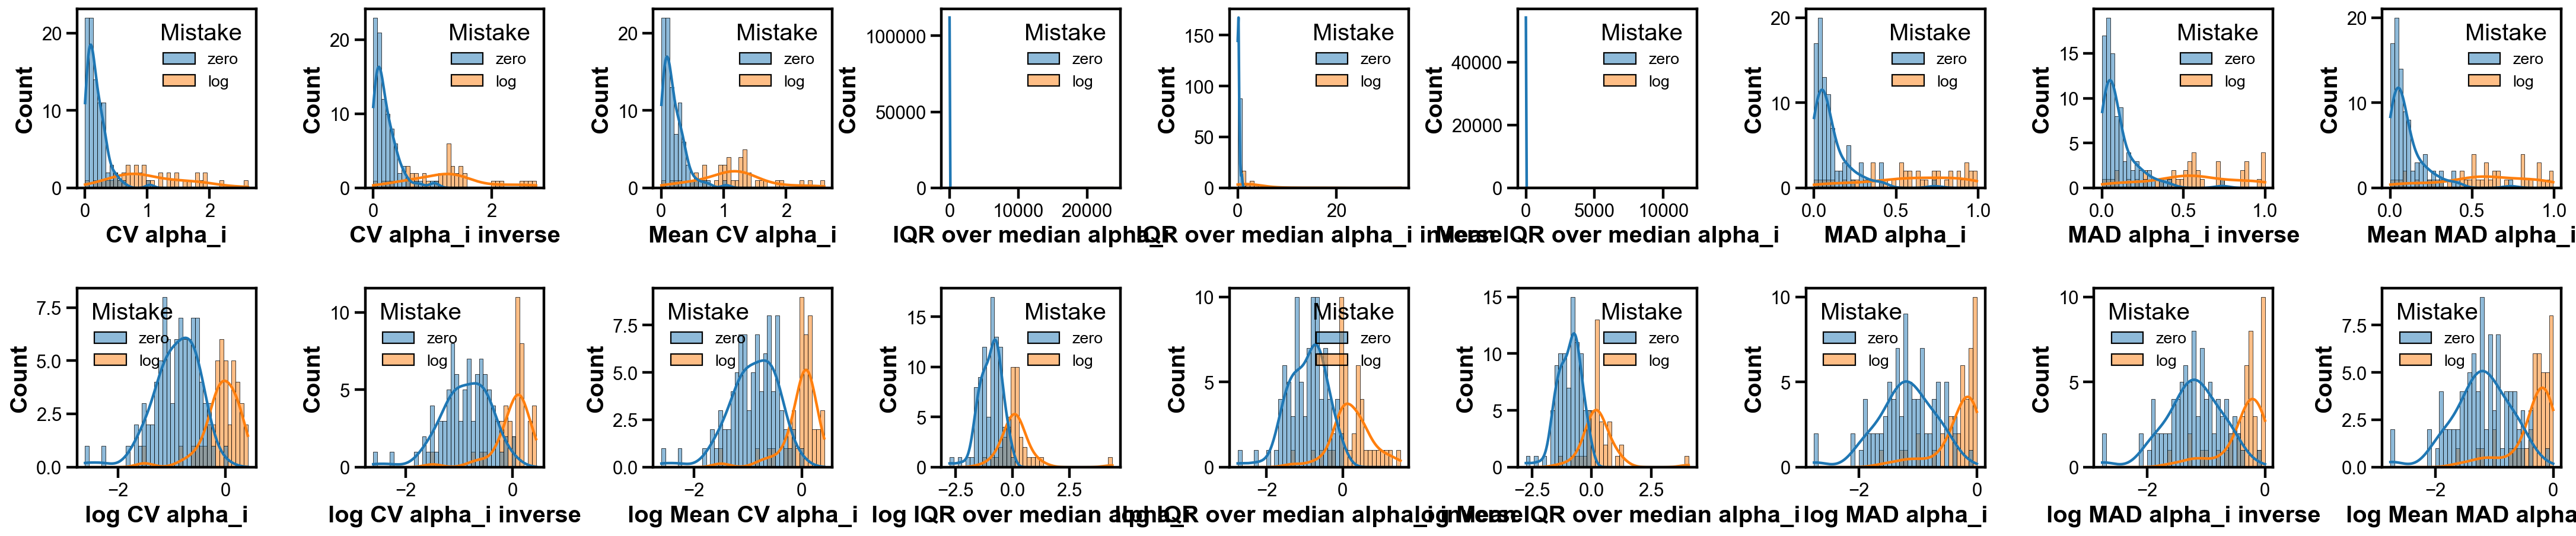

In [25]:
property_list = [
    'CV alpha_i',
    'CV alpha_i inverse',
    'Mean CV alpha_i',
    'IQR over median alpha_i',
    'IQR over median alpha_i inverse',
    'Mean IQR over median alpha_i',
    'MAD alpha_i',
    'MAD alpha_i inverse',
    'Mean MAD alpha_i',
]
row = 2
col = len(property_list)
scale = 3
fig, axs = plt.subplots(row, col, figsize=(col*scale, row*scale))
for col_i in range(col):
    sns.histplot(
        cv_df[cv_df['CV alpha_i'] > 0],
        x=property_list[col_i],
        hue='Mistake',
        bins=40,
        kde=True,
        # bins=np.linspace(-3.5, 3.5, 29),
        ax=axs[0, col_i],
    )
    sns.histplot(
            cv_df[cv_df['CV alpha_i'] > 0],
            x=f'log {property_list[col_i]}',
            hue='Mistake',
            bins=40,
            kde=True,
            # bins=np.linspace(-3.5, 3.5, 29),
            ax=axs[1, col_i],
        )
for col_i in range(col):
    for row_i in range(row):
        axs[row_i, col_i].set_box_aspect(1)
plt.tight_layout(pad=0.2)

## Lie factor of fold changes

In [57]:
def get_size_of_effect(series):
    # get permutations of all items as 2d array
    comb_arr = itertools.permutations(series, 2)
    comb_arr = np.array(list(comb_arr))
    # calculate size of effect for each permutation as series
    effect = comb_arr[:, 1] / comb_arr[:, 0]
    effect = pd.Series(effect)
    # effect = effect[effect > 0]
    return effect

'10.1038:s41551-023-01143-w_log_fig1'

In [90]:
comb_arr = itertools.permutations(df['viz'].reset_index(drop=True), 2)
comb_arr = np.array(list(comb_arr))
effect = comb_arr[:, 1] / comb_arr[:, 0]
effect = pd.Series(effect)
effect = effect[effect > 1]

In [91]:
comb_arr = itertools.permutations(df['val'].reset_index(drop=True), 2)
comb_arr = np.array(list(comb_arr))
effect_val = comb_arr[:, 1] / comb_arr[:, 0]
effect_val = pd.Series(effect_val)
effect_val = effect_val[effect_val > 1]

<Axes: ylabel='Count'>

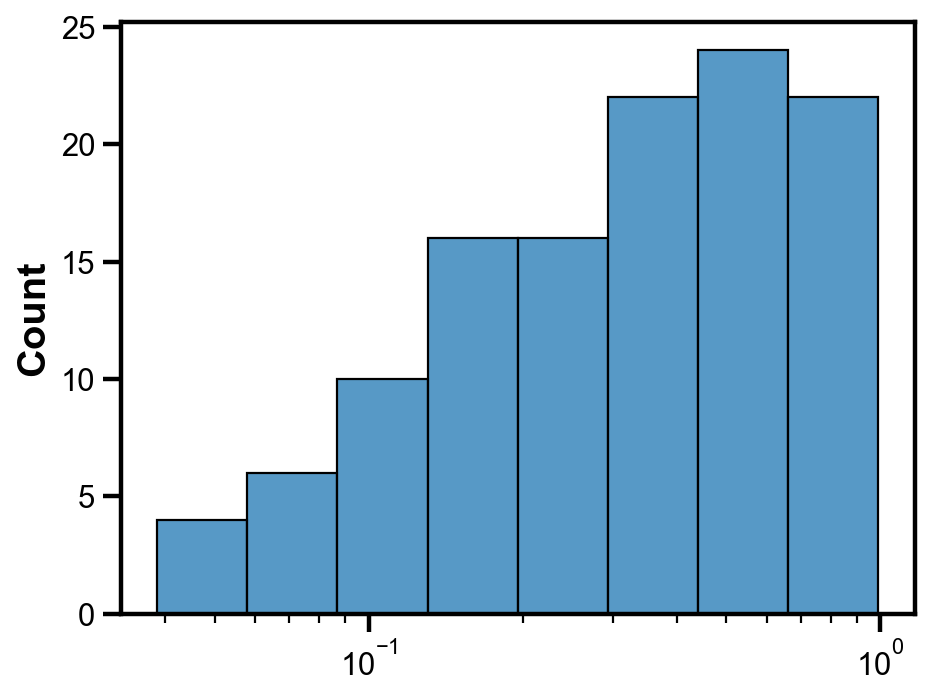

In [92]:
plt.xscale('log')
sns.histplot(effect / effect_val)

In [93]:
max(effect / effect_val)

0.9915829089130384

In [59]:
df = bar_df.loc[bar_df.index.get_level_values(0) == bar_df.index[-1][0]]
df

val         Journal  \
10.1038:s41551-023-01143-w_log_fig1 0   2202.462071  nat_biomed_eng   
                                    1   1260.487664  nat_biomed_eng   
                                    2    924.461202  nat_biomed_eng   
                                    3    983.600343  nat_biomed_eng   
                                    4    837.145059  nat_biomed_eng   
                                    5    423.224612  nat_biomed_eng   
                                    6    248.297913  nat_biomed_eng   
                                    7    128.681247  nat_biomed_eng   
                                    8     41.115312  nat_biomed_eng   
                                    9    322.165473  nat_biomed_eng   
                                    10   162.873036  nat_biomed_eng   
                                    11  1556.325877  nat_biomed_eng   
                                    12  1537.143957  nat_biomed_eng   
                                    13    20.026995  nat_biomed_eng   
                                    14  4578.067864  nat_biomed_eng   
                                    15  4044.103502  nat_biomed_eng   

                                                               DOI Mistake  \
10.1038:s41551-023-01143-w_log_fig1 0   10.1038:s41551-023-01143-w     log   
                                    1   10.1038:s41551-023-01143-w     log   
                                    2   10.1038:s41551-023-01143-w     log   
                                    3   10.1038:s41551-023-01143-w     log   
                                    4   10.1038:s41551-023-01143-w     log   
                                    5   10.1038:s41551-023-01143-w     log   
                                    6   10.1038:s41551-023-01143-w     log   
                                    7   10.1038:s41551-023-01143-w     log   
                                    8   10.1038:s41551-023-01143-w     log   
                                    9   10.1038:s41551-023-01143-w     log   
                                    10  10.1038:s41551-023-01143-w     log   
                                    11  10.1038:s41551-023-01143-w     log   
                                    12  10.1038:s41551-023-01143-w     log   
                                    13  10.1038:s41551-023-01143-w     log   
                                    14  10.1038:s41551-023-01143-w     log   
                                    15  10.1038:s41551-023-01143-w     log   

                                       Fig ID       viz  viz_over_val  
10.1038:s41551-023-01143-w_log_fig1 0       1  0.780969      0.000355  
                                    1       1  0.700180      0.000555  
                                    2       1  0.655296      0.000709  
                                    3       1  0.664273      0.000675  
                                    4       1  0.640934      0.000766  
                                    5       1  0.542190      0.001281  
                                    6       1  0.464991      0.001873  
                                    7       1  0.369838      0.002874  
                                    8       1  0.204668      0.004978  
                                    9       1  0.502693      0.001560  
                                    10      1  0.403950      0.002480  
                                    11      1  0.730700      0.000470  
                                    12      1  0.728905      0.000474  
                                    13      1  0.100539      0.005020  
                                    14      1  0.886894      0.000194  
                                    15      1  0.868941      0.000215

### Figure-level data

#### Coefficient of variation of $\alpha \equiv y_i/x_i$

In [31]:
cv(bar_df.loc[bar_df.index.get_level_values(0) == '10.1038:s41551-023-01146-7_log_fig1', 'viz_over_val'])

1.8645639000910095

In [32]:
bar_df.loc[bar_df.index.get_level_values(0) == '10.1038:s41551-023-01146-7_log_fig1', 'viz_over_val'].std() / bar_df.loc[bar_df.index.get_level_values(0) == '10.1038:s41551-023-01146-7_log_fig1', 'viz_over_val'].mean()

1.8645639000910095

In [33]:
fig_index = bar_df['viz_over_val'].index.get_level_values(0)
fig_ids = np.unique(fig_index)
cv_list = []
for fig_id in fig_ids:
    cv_list.append(cv(bar_df['viz_over_val'][fig_index == fig_id]))
cv_viz_over_val = pd.Series(cv_list, index=fig_ids)
cv_viz_over_val

10.1038:s41551-022-00991-2_zero_fig1    0.260350
10.1038:s41551-022-00991-2_zero_fig2    0.134903
10.1038:s41551-022-01000-2_zero_fig1    0.199067
10.1038:s41551-022-01000-2_zero_fig2    0.186817
10.1038:s41551-022-01000-2_zero_fig3    0.310437
                                          ...   
10.1038:s41551-023-01143-w_log_fig7     0.701109
10.1038:s41551-023-01146-7_log_fig1     1.864564
10.1038:s41551-023-01146-7_log_fig2     1.818594
10.1038:s41551-023-01153-8_zero_fig1    0.395117
10.1038:s41551-023-01160-9_zero_fig1    0.249511
Length: 133, dtype: float64

In [34]:
# add metadata
cv_viz_over_val_df = pd.Series(fig_ids).str.split('_', expand=True)
cv_viz_over_val_df.columns = ['DOI', 'Mistake', 'Fig ID']
cv_viz_over_val_df.index = fig_ids
cv_viz_over_val_df['cv_viz_over_val'] = cv_viz_over_val
cv_viz_over_val_df

,DOI,Mistake,Fig ID,cv_viz_over_val
10.1038:s41551-022-00991-2_zero_fig1,10.1038:s41551-022-00991-2,zero,fig1,0.260350
10.1038:s41551-022-00991-2_zero_fig2,10.1038:s41551-022-00991-2,zero,fig2,0.134903
10.1038:s41551-022-01000-2_zero_fig1,10.1038:s41551-022-01000-2,zero,fig1,0.199067
10.1038:s41551-022-01000-2_zero_fig2,10.1038:s41551-022-01000-2,zero,fig2,0.186817
10.1038:s41551-022-01000-2_zero_fig3,10.1038:s41551-022-01000-2,zero,fig3,0.310437
...,...,...,...,...
10.1038:s41551-023-01143-w_log_fig7,10.1038:s41551-023-01143-w,log,fig7,0.701109
10.1038:s41551-023-01146-7_log_fig1,10.1038:s41551-023-01146-7,log,fig1,1.864564
10.1038:s41551-023-01146-7_log_fig2,10.1038:s41551-023-01146-7,log,fig2,1.818594
10.1038:s41551-023-01153-8_zero_fig1,10.1038:s41551-023-01153-8,zero,fig1,0.395117


<Axes: xlabel='cv_viz_over_val', ylabel='Count'>

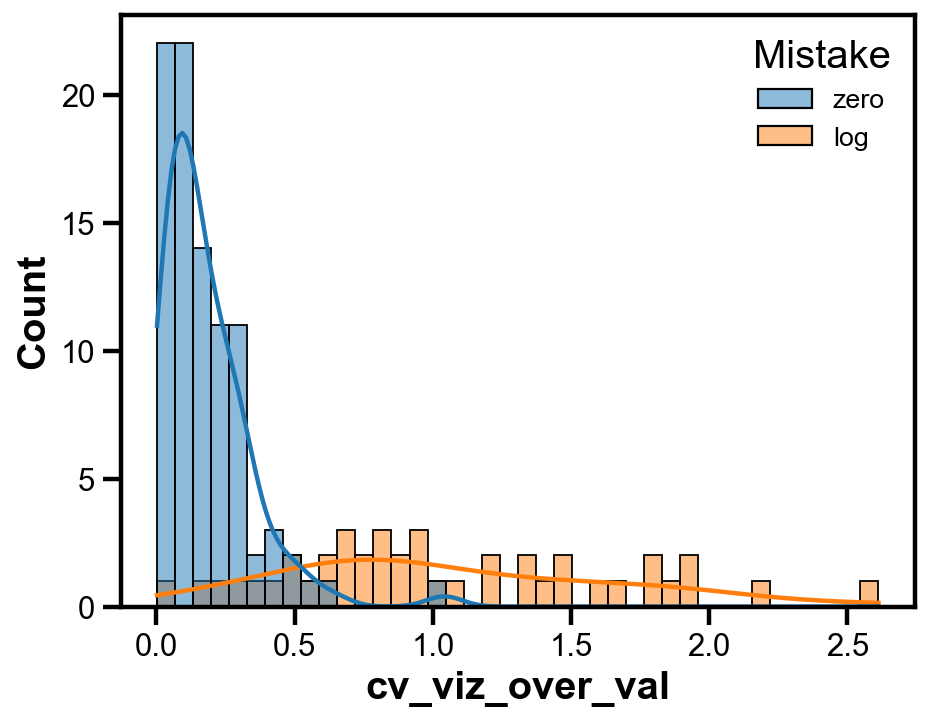

In [35]:
sns.histplot(
    cv_viz_over_val_df[cv_viz_over_val_df['cv_viz_over_val'] > 0],
    x='cv_viz_over_val',
    hue='Mistake',
    bins=40,
    kde=True,
)

### Bar-permutation-level (bar pairs) data

In [54]:
fig_index = bar_df.index.get_level_values(0)
fig_ids = np.unique(fig_index)

In [170]:
# for j, fig_id in enumerate(fig_ids):
for j, fig_id in enumerate(['10.1038:s41551-023-01011-7_log_fig1']):
    # get series for each figure
    fig_level_series = bar_df[bar_df.index.get_level_values(0) == fig_id]
    # generate permutations of bars
    comb_arr = itertools.permutations(np.array(fig_level_series.index), 2)
    comb_arr = list(comb_arr)
    # go through each bar pair permutation to calculate lie factor
    # figure level list
    figure_lie_factor_list = []
    for i in range(len(comb_arr)):
        # calculate normalized size of effect for visualization and actual value
        viz_values = fig_level_series.loc[list(comb_arr[i]), 'viz']
        val_values = fig_level_series.loc[list(comb_arr[i]), 'val']
        viz_effect = np.diff(viz_values)[0] / viz_values.iloc[0]
        val_effect = np.diff(val_values)[0] / val_values.iloc[0]
        print(viz_values)
        print(val_values)
        print(viz_effect)
        print(val_effect)
        # calculate and store the lie factor
        lie_factor = viz_effect / val_effect
        print('>', lie_factor)
        figure_lie_factor_list.append(lie_factor)
        

10.1038:s41551-023-01011-7_log_fig1  0    0.997085
                                     1    0.323615
Name: viz, dtype: float64
10.1038:s41551-023-01011-7_log_fig1  0    0.984614
                                     1    0.027397
Name: val, dtype: float64
-0.6754385964912281
-0.9721744059779288
> 0.6947710126268871
10.1038:s41551-023-01011-7_log_fig1  0    0.997085
                                     2    0.180758
Name: viz, dtype: float64
10.1038:s41551-023-01011-7_log_fig1  0    0.984614
                                     2    0.012816
Name: val, dtype: float64
-0.8187134502923978
-0.9869839827804886
> 0.8295103715725495
10.1038:s41551-023-01011-7_log_fig1  0    0.997085
                                     3    0.094752
Name: viz, dtype: float64
10.1038:s41551-023-01011-7_log_fig1  0    0.984614
                                     3    0.008111
Name: val, dtype: float64
-0.9049707602339182
-0.9917619406618259
> 0.912487889613923
10.1038:s41551-023-01011-7_log_fig1  1    0.323615

In [171]:
figure_lie_factor_list

[0.6947710126268871,
 0.8295103715725495,
 0.912487889613923,
 0.05956474160716582,
 0.8294207523839765,
 1.0046420315165137,
 0.059557210932449034,
 0.6946081212035707,
 1.2961824112218514,
 0.07910333070651186,
 1.0158543230256314,
 1.5650249075616856]

In [150]:
df = pd.DataFrame(lie_factor_list, index=comb_arr)
df.column = 'Lie factor'
df

,0
"((10.1038:s41551-023-01160-9_zero_fig1, 0), (10.1038:s41551-023-01160-9_zero_fig1, 1))",2.621094
"((10.1038:s41551-023-01160-9_zero_fig1, 0), (10.1038:s41551-023-01160-9_zero_fig1, 2))",2.621094
"((10.1038:s41551-023-01160-9_zero_fig1, 0), (10.1038:s41551-023-01160-9_zero_fig1, 3))",2.621094
"((10.1038:s41551-023-01160-9_zero_fig1, 0), (10.1038:s41551-023-01160-9_zero_fig1, 4))",2.621094
"((10.1038:s41551-023-01160-9_zero_fig1, 0), (10.1038:s41551-023-01160-9_zero_fig1, 5))",2.621094
...,...
"((10.1038:s41551-023-01160-9_zero_fig1, 12), (10.1038:s41551-023-01160-9_zero_fig1, 7))",3.485030
"((10.1038:s41551-023-01160-9_zero_fig1, 12), (10.1038:s41551-023-01160-9_zero_fig1, 8))",3.485030
"((10.1038:s41551-023-01160-9_zero_fig1, 12), (10.1038:s41551-023-01160-9_zero_fig1, 9))",3.485030
"((10.1038:s41551-023-01160-9_zero_fig1, 12), (10.1038:s41551-023-01160-9_zero_fig1, 10))",3.485030


In [140]:
pd.Series(lie_factor)

0    3.48503
dtype: float64

In [139]:
comb_arr[i]

(('10.1038:s41551-023-01160-9_zero_fig1', 12),
 ('10.1038:s41551-023-01160-9_zero_fig1', 11))

In [136]:
len(lie_factor_list)

156

<Axes: ylabel='Count'>

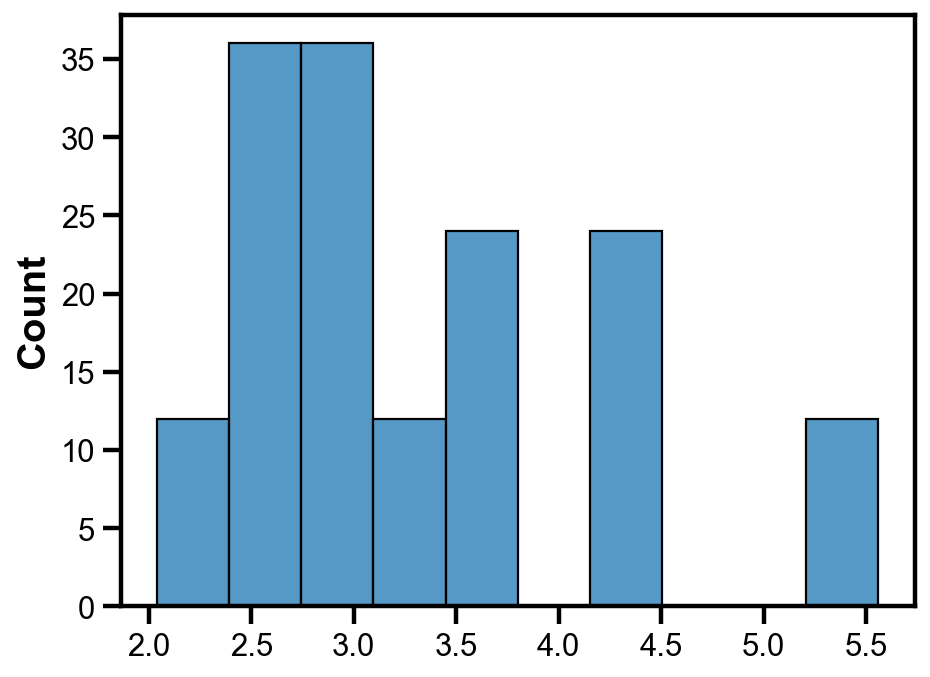

In [137]:
sns.histplot(
    lie_factor_list
)

### CV of effect size

In [706]:
def get_size_of_effect(series):
    # get permutations of all items as 2d array
    comb_arr = itertools.permutations(series, 2)
    comb_arr = np.array(list(comb_arr))
    # calculate size of effect for each permutation as series
    effect = comb_arr[:, 1] / comb_arr[:, 0]
    effect = pd.Series(effect)
    # effect = effect[effect > 0]
    return effect

In [707]:
filepath = os.path.join(DATA_DIR, MISUSED_BAR_DIR, 'nat_biomed_eng', LOG_SUBDIR)
filenames = os.listdir(filepath)
filenames = pd.Series(filenames)
filenames = filenames[filenames.str.contains(CSV_FILEEXT) & filenames.str.contains(VAL_LABEL)]
filenames = filenames.reset_index(drop=True)
fignames = filenames.str.slice(stop=-8)
filepaths = filepath + os.sep + filenames

In [708]:
raw_df_dict = {}
for i, filepath in enumerate(filepaths):
    val_df = pd.read_csv(filepath, header=None, index_col=0)
    val_df = val_df.reset_index(drop=True)
    val_series = val_df.iloc[:, 0]
    val_series.name = 'Data Value'
    val_effect_series = get_size_of_effect(val_series)
    raw_df_dict[fignames[i]] = val_effect_series

In [709]:
val_series = pd.concat(raw_df_dict)
val_series

10.1038:s41551-023-01143-w_log_fig4  0      0.895647
                                     1      2.095885
                                     2      1.099071
                                     3      0.802183
                                     4      0.297512
                                              ...   
10.1038:s41551-023-01143-w_log_fig1  235    0.040274
                                     236    0.384838
                                     237    0.380095
                                     238    0.004952
                                     239    1.132035
Length: 11296, dtype: float64

In [710]:
filepath = os.path.join(DATA_DIR, MISUSED_BAR_DIR, 'nat_biomed_eng', LOG_SUBDIR)
filenames = os.listdir(filepath)
filenames = pd.Series(filenames)
filenames = filenames[filenames.str.contains(CSV_FILEEXT) & filenames.str.contains(VIZ_LABEL)]
filenames = filenames.reset_index(drop=True)
fignames = filenames.str.slice(stop=-8)
filepaths = filepath + os.sep + filenames

In [711]:
raw_df_dict = {}
for i, filepath in enumerate(filepaths):
    viz_df = pd.read_csv(filepath, header=None, index_col=0)
    viz_df = viz_df.reset_index(drop=True)
    viz_series = viz_df.iloc[:, 0]
    viz_series.name = 'Data Value'
    viz_effect_series = get_size_of_effect(viz_series)
    raw_df_dict[fignames[i]] = viz_effect_series

In [712]:
viz_series = pd.concat(raw_df_dict)
viz_series

10.1038:s41551-023-01069-3_log_fig1  0    1.400000
                                     1    0.720000
                                     2    1.232000
                                     3    1.648000
                                     4    3.176000
                                            ...   
10.1038:s41551-023-01134-x_log_fig1  1    1.218354
                                     2    0.957576
                                     3    1.166667
                                     4    0.820779
                                     5    0.857143
Length: 11296, dtype: float64

In [713]:
viz_series[viz_series.index.get_level_values(0) == '10.1038:s41551-022-00991-2_zero_fig1']

Series([], dtype: float64)

In [714]:
val_series[val_series.index.get_level_values(0) == '10.1038:s41551-022-00991-2_zero_fig1']

Series([], dtype: float64)

<Axes: ylabel='Count'>

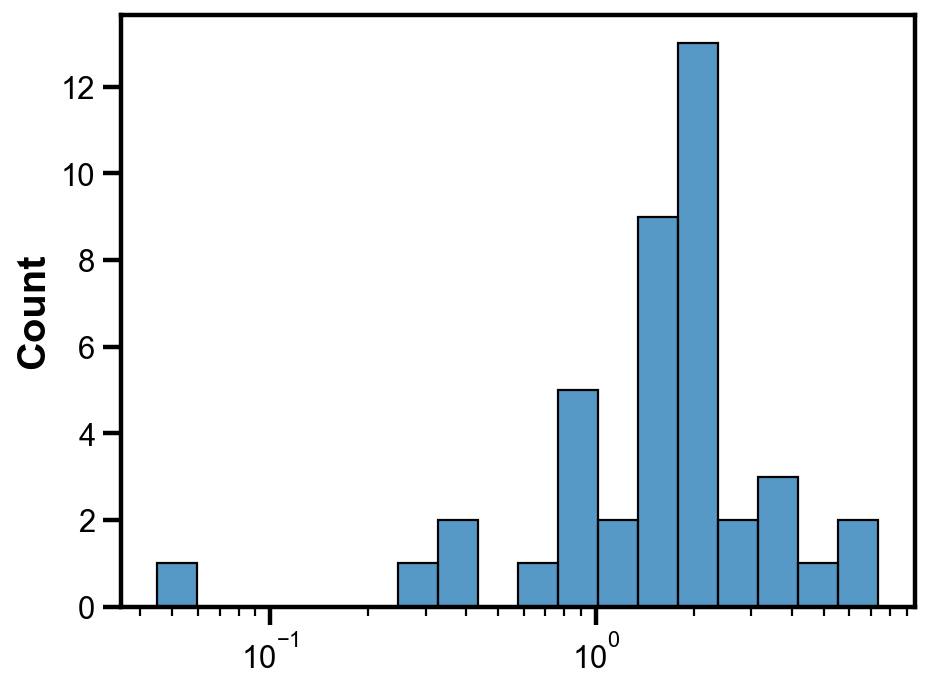

In [720]:
alpha = viz_series / val_series
plt.xscale('log')
sns.histplot(cv(alpha.groupby(alpha.index.get_level_values(0))))

In [703]:
cv(alpha.groupby(alpha.index.get_level_values(0)))

10.1038:s41551-022-00991-2_zero_fig1    0.451740
10.1038:s41551-022-00991-2_zero_fig2    0.195686
10.1038:s41551-022-01000-2_zero_fig1    0.281633
10.1038:s41551-022-01000-2_zero_fig2    0.303835
10.1038:s41551-022-01000-2_zero_fig3    0.520425
                                          ...   
10.1038:s41551-023-01136-9_zero_fig8    0.227286
10.1038:s41551-023-01136-9_zero_fig9    0.117014
10.1038:s41551-023-01138-7_zero_fig1   -2.920577
10.1038:s41551-023-01153-8_zero_fig1    0.890778
10.1038:s41551-023-01160-9_zero_fig1    0.379255
Length: 91, dtype: float64

### CV

In [445]:
cv(pd.Series([10, 50, 1000/3, 1e4/4]))

1.649524992810022

In [547]:
base = 10
k_list = np.linspace(-300, 300, 10000)
cv_alpha_list = []
for k in k_list:
    alpha = np.array([1, k, 1e10])
    cv_alpha = np.abs(cv(alpha))
    cv_alpha_list.append(cv_alpha)

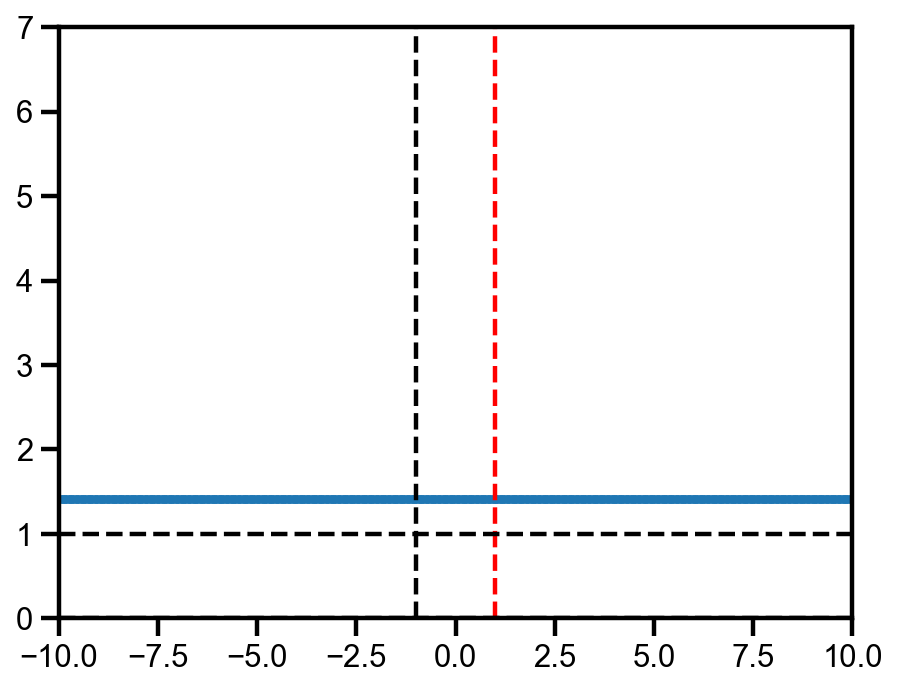

In [548]:
fig, ax = plt.subplots()
ax.plot((k_list), np.array(cv_alpha_list), '.')
ax.set_ylim(0, 7)
ax.set_xlim(-10, 10)
ax.axvline(1, color='r', ls='--')
ax.axvline(-1, color='k', ls='--')
# ax.axvline(base, color='k', ls='--')
# ax.axvline(-base, color='k', ls='--')
ax.axhline(0, color='k', ls='--')
ax.axhline(1, color='k', ls='--')
ax.axhline(-1, color='k', ls='--')

In [456]:
base = 10
k_list = np.arange(-300, 300, 0.01)
cv_alpha_list = []
for k in k_list:
    x = np.array([1, base])
    y = np.array([1, k])
    alpha = x / y
    cv_alpha = np.abs(cv(alpha))
    cv_alpha_list.append(cv_alpha)

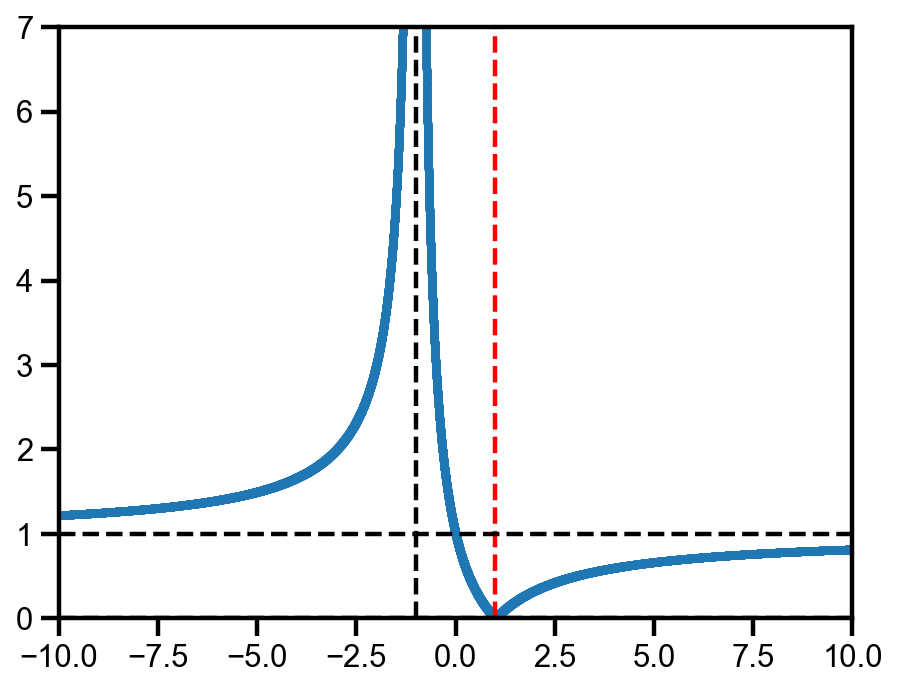

In [457]:
fig, ax = plt.subplots()
ax.plot(k_list / base, cv_alpha_list, '.')
ax.set_ylim(0, 7)
ax.set_xlim(-10, 10)
ax.axvline(1, color='r', ls='--')
ax.axvline(-1, color='k', ls='--')
# ax.axvline(base, color='k', ls='--')
# ax.axvline(-base, color='k', ls='--')
ax.axhline(0, color='k', ls='--')
ax.axhline(1, color='k', ls='--')

### Log

In [574]:
filepath = os.path.join(DATA_DIR, MISUSED_BAR_DIR, 'nat_biomed_eng', ZERO_SUBDIR)
filenames = os.listdir(filepath)
filenames = pd.Series(filenames)
filenames = filenames[filenames.str.contains(CSV_FILEEXT) & filenames.str.contains(VAL_LABEL)]
filenames = filenames.reset_index(drop=True)
fignames = filenames.str.slice(stop=-8)
filepaths = filepath + os.sep + filenames

In [575]:
raw_df_dict = {}
for i, filepath in enumerate(filepaths):
    val_df = pd.read_csv(filepath, header=None, index_col=0)
    val_df = val_df.reset_index(drop=True)
    val_series = val_df.iloc[:, 0]
    val_series.name = 'Data Value'
    raw_df_dict[fignames[i]] = val_series

In [576]:
val_series = pd.concat(raw_df_dict)
val_series

10.1038:s41551-023-01136-9_zero_fig11  0      6.103846
                                       1      7.142308
10.1038:s41551-023-01106-1_zero_fig6   0      0.642522
                                       1      0.784164
10.1038:s41551-023-01134-x_zero_fig4   0      0.570892
                                               ...    
10.1038:s41551-023-01134-x_zero_fig1   1    706.077348
                                       2    659.668508
10.1038:s41551-023-01106-1_zero_fig11  0      0.728553
                                       1      0.748892
                                       2      0.811473
Name: Data Value, Length: 412, dtype: float64

In [577]:
filepath = os.path.join(DATA_DIR, MISUSED_BAR_DIR, 'nat_biomed_eng', ZERO_SUBDIR)
filenames = os.listdir(filepath)
filenames = pd.Series(filenames)
filenames = filenames[filenames.str.contains(CSV_FILEEXT) & filenames.str.contains(VIZ_LABEL)]
filenames = filenames.reset_index(drop=True)
fignames = filenames.str.slice(stop=-8)
filepaths = filepath + os.sep + filenames

In [578]:
raw_df_dict = {}
for i, filepath in enumerate(filepaths):
    viz_df = pd.read_csv(filepath, header=None, index_col=0)
    viz_df = viz_df.reset_index(drop=True)
    viz_series = viz_df.iloc[:, 0]
    viz_series.name = 'Data Value'
    raw_df_dict[fignames[i]] = viz_series

In [579]:
viz_series = pd.concat(raw_df_dict)
viz_series

10.1038:s41551-023-01113-2_zero_fig1  0    0.651786
                                      1    0.602679
                                      2    0.553571
                                      3    0.537946
10.1038:s41551-023-01106-1_zero_fig8  0    0.594241
                                             ...   
10.1038:s41551-023-01138-7_zero_fig1  1    0.460377
                                      2    0.592453
                                      3    0.254717
                                      4    0.335849
                                      5    0.141509
Name: Data Value, Length: 412, dtype: float64

In [580]:
cv = lambda series: series.std() / series.mean()

<Axes: xlabel='Data Value', ylabel='Count'>

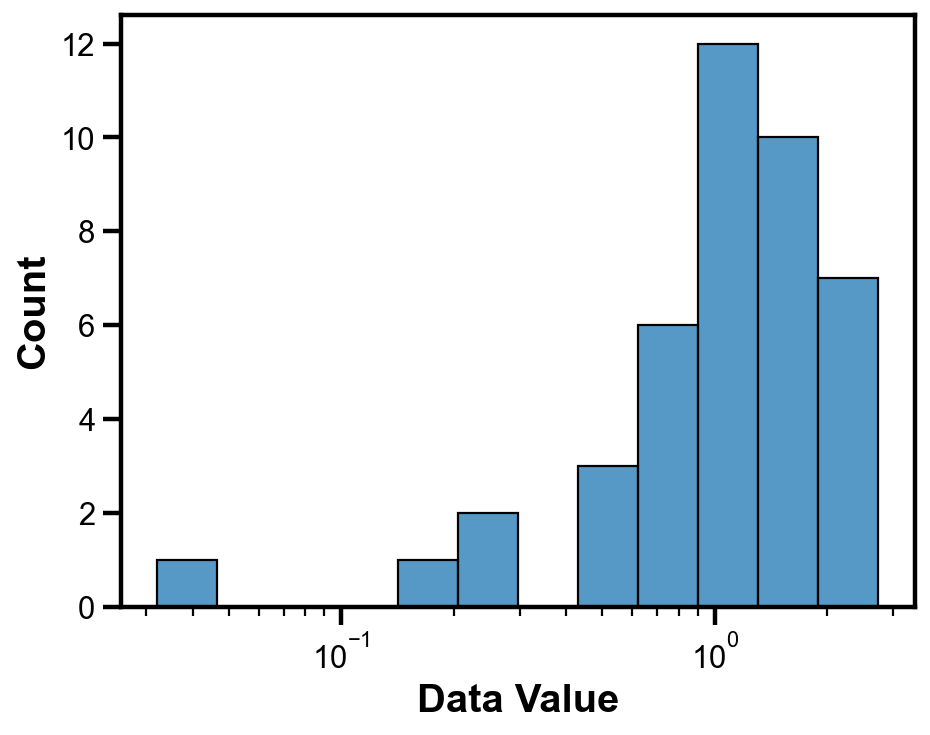

In [573]:
# log
alpha = val_series / viz_series
plt.xscale('log')
sns.histplot(cv(alpha.groupby(alpha.index.get_level_values(0))))

<Axes: xlabel='Data Value', ylabel='Count'>

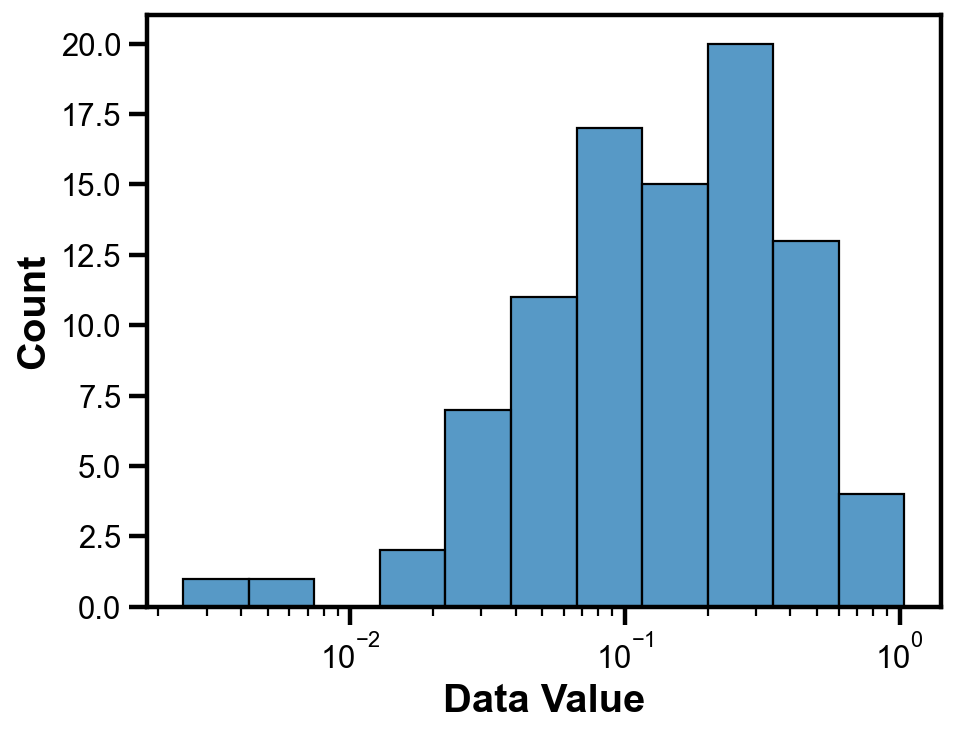

In [581]:
# zero
alpha = val_series / viz_series
plt.xscale('log')
sns.histplot(cv(alpha.groupby(alpha.index.get_level_values(0))))


In [594]:
cv(alpha.groupby(alpha.index.get_level_values(0)))[cv(alpha.groupby(alpha.index.get_level_values(0))) < 5e-2]

10.1038:s41551-023-01049-7_zero_fig11    0.031530
10.1038:s41551-023-01049-7_zero_fig12    0.005214
10.1038:s41551-023-01049-7_zero_fig13    0.047615
10.1038:s41551-023-01049-7_zero_fig14    0.020992
10.1038:s41551-023-01049-7_zero_fig15    0.002462
10.1038:s41551-023-01049-7_zero_fig2     0.030181
10.1038:s41551-023-01049-7_zero_fig6     0.025872
10.1038:s41551-023-01049-7_zero_fig7     0.022917
10.1038:s41551-023-01049-7_zero_fig8     0.037180
10.1038:s41551-023-01106-1_zero_fig3     0.031297
10.1038:s41551-023-01106-1_zero_fig5     0.015207
10.1038:s41551-023-01106-1_zero_fig7     0.034098
10.1038:s41551-023-01106-1_zero_fig9     0.043491
10.1038:s41551-023-01136-9_zero_fig6     0.045917
Name: Data Value, dtype: float64

In [595]:
cv(control2_val_series / control2_viz_series)

0.0023962348863106535

In [551]:
cv(control1_val_series / control1_viz_series)

0.0037446395325699635

In [562]:
cv(alpha.groupby(alpha.index.get_level_values(0))).min()

0.032053397839272406

In [ ]:
DOI = '10.1038:s41551-023-01028-y_log_fig1'

In [309]:
alpha = val_series / viz_series
np.std(alpha) / np.mean(alpha)

10.757796281948139

In [307]:
alpha = val_series[val_series.index.get_level_values(0) == DOI] / viz_series[viz_series.index.get_level_values(0) == DOI]
np.std(alpha) / np.mean(alpha)

1.2286074575360892

In [204]:
def get_size_of_effect_df(series):
    # get permutations of all items as 2d array
    comb_arr = itertools.permutations(series, 2)
    comb_arr = np.array(list(comb_arr))
    # calculate size of effect for each permutation as series
    effect = np.diff(comb_arr).reshape(-1) / comb_arr[:, 0]
    effect = pd.Series(effect)
    effect_df = pd.concat([pd.DataFrame(comb_arr), effect], axis=1)
    effect_df.columns = ['Bar 1', 'Bar 2', 'Effect Size']
    return effect_df

In [149]:
def get_size_of_effect_df(series):
    # get permutations of all items as 2d array
    comb_arr = itertools.permutations(series, 2)
    comb_arr = np.array(list(comb_arr))
    # calculate size of effect for each permutation as series
    effect = comb_arr[:, 1] / comb_arr[:, 0]
    effect = pd.Series(effect)
    effect_df = pd.concat([pd.DataFrame(comb_arr), effect], axis=1)
    effect_df.columns = ['Bar 1', 'Bar 2', 'Effect Size']
    return effect_df

In [ ]:
def get_size_of_effect_df(series):
    # get permutations of all items as 2d array
    comb_arr = itertools.permutations(series, 2)
    comb_arr = np.array(list(comb_arr))
    # calculate size of effect for each permutation as series
    effect = comb_arr[:, 1] / comb_arr[:, 0]
    effect = pd.Series(effect)
    effect_df = pd.concat([pd.DataFrame(comb_arr), effect], axis=1)
    effect_df.columns = ['Bar 1', 'Bar 2', 'Effect Size']
    return effect_df

In [150]:
test_df = get_size_of_effect_df(val_series)
test_df

,Bar 1,Bar 2,Effect Size
0,2202.462071,1260.487664,0.572308
1,2202.462071,924.461202,0.419740
2,2202.462071,983.600343,0.446591
3,2202.462071,837.145059,0.380095
4,2202.462071,423.224612,0.192160
...,...,...,...
235,4044.103502,162.873036,0.040274
236,4044.103502,1556.325877,0.384838
237,4044.103502,1537.143957,0.380095
238,4044.103502,20.026995,0.004952


<Axes: xlabel='Effect Size', ylabel='Count'>

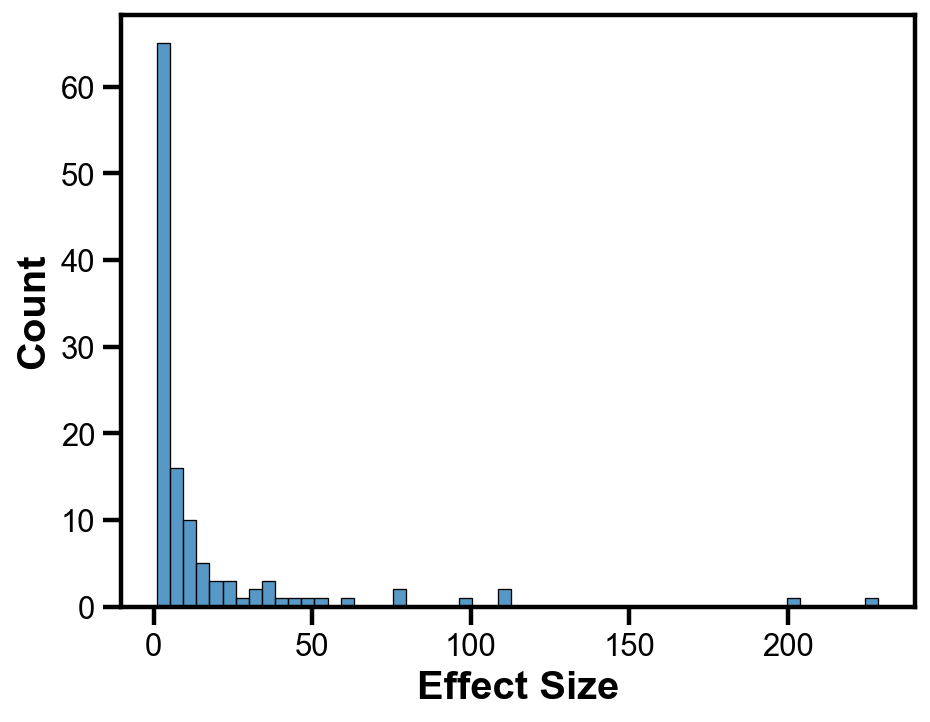

In [151]:
sns.histplot(
    test_df[test_df['Bar 1'] < test_df['Bar 2']],
    x='Effect Size'
)

<Axes: xlabel='Effect Size', ylabel='Count'>

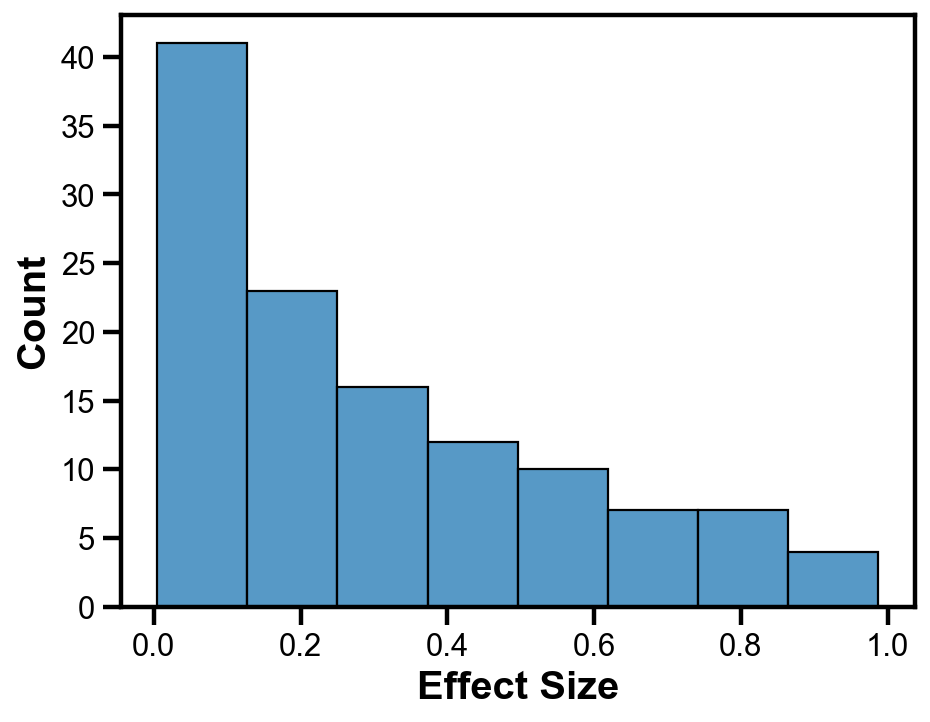

In [152]:
sns.histplot(
    test_df[test_df['Bar 1'] > test_df['Bar 2']],
    x='Effect Size'
)

In [179]:
len(list(itertools.permutations(np.arange(0, 10), 2)))

90

In [80]:
def get_filepaths(mistake, label):
    filepath = os.path.join(DATA_DIR, MISUSED_BAR_DIR, 'nat_biomed_eng', mistake)
    filenames = os.listdir(filepath)
    filenames = pd.Series(filenames)
    filenames = filenames[filenames.str.contains(CSV_FILEEXT) & filenames.str.contains(label)]
    filenames = filenames.reset_index(drop=True)
    fignames = filenames.str.slice(stop=-8)
    filepaths = filepath + os.sep + filenames
    return filenames, filepaths


def get_csv_dict(filenames, filepaths):
    raw_df_dict = {}
    for i, filepath in enumerate(filepaths):
        df = pd.read_csv(filepath, header=None, index_col=0)
        df = df.reset_index(drop=True)
        series = df.iloc[:, 0]
        series.name = 'Data Value'
        effect_series = get_size_of_effect(series)
        raw_df_dict[fignames[i]] = effect_series
    return raw_df_dict

In [93]:
log_val_filepaths = get_filepaths(ZERO_SUBDIR, VAL_LABEL)
log_val_df_dict = get_csv_dict(log_val_filepaths)
log_val_series = pd.concat(log_val_df_dict)

log_viz_filepaths = get_filepaths(ZERO_SUBDIR, VIZ_LABEL)
log_viz_df_dict = get_csv_dict(log_viz_filepaths)
log_viz_series = pd.concat(log_viz_df_dict)

KeyError: 42

In [85]:
lie_factor_df = get_lie_factor(log_viz_series, log_val_series)
lie_factor_df

10.1038:s41551-022-01001-1_log_fig1  0      -0.079265
                                     1      22.106746
                                     2      -1.600531
                                     3     -15.465081
                                     4      -2.808713
                                              ...    
10.1038:s41551-023-01146-7_log_fig2  337          NaN
                                     338          NaN
                                     339          NaN
                                     340          NaN
                                     341          NaN
Length: 20756, dtype: float64

In [91]:
log_viz_series.index

MultiIndex([('10.1038:s41551-023-01143-w_log_fig4', 0),
            ('10.1038:s41551-023-01143-w_log_fig4', 1),
            ('10.1038:s41551-023-01143-w_log_fig4', 2),
            ('10.1038:s41551-023-01143-w_log_fig4', 3),
            ('10.1038:s41551-023-01143-w_log_fig4', 4),
            ('10.1038:s41551-023-01143-w_log_fig4', 5),
            ('10.1038:s41551-023-01143-w_log_fig4', 6),
            ('10.1038:s41551-023-01143-w_log_fig4', 7),
            ('10.1038:s41551-023-01143-w_log_fig4', 8),
            ('10.1038:s41551-023-01143-w_log_fig4', 9),
            ...
            ('10.1038:s41551-023-01112-3_log_fig3', 2),
            ('10.1038:s41551-023-01112-3_log_fig3', 3),
            ('10.1038:s41551-023-01112-3_log_fig3', 4),
            ('10.1038:s41551-023-01112-3_log_fig3', 5),
            ('10.1038:s41551-023-01143-w_log_fig1', 0),
            ('10.1038:s41551-023-01143-w_log_fig1', 1),
            ('10.1038:s41551-023-01143-w_log_fig1', 2),
            ('10.1038:s41551-023

In [92]:
log_val_series.index

MultiIndex([('10.1038:s41551-023-01143-w_log_fig4',   0),
            ('10.1038:s41551-023-01143-w_log_fig4',   1),
            ('10.1038:s41551-023-01143-w_log_fig4',   2),
            ('10.1038:s41551-023-01143-w_log_fig4',   3),
            ('10.1038:s41551-023-01143-w_log_fig4',   4),
            ('10.1038:s41551-023-01143-w_log_fig4',   5),
            ('10.1038:s41551-023-01143-w_log_fig4',   6),
            ('10.1038:s41551-023-01143-w_log_fig4',   7),
            ('10.1038:s41551-023-01143-w_log_fig4',   8),
            ('10.1038:s41551-023-01143-w_log_fig4',   9),
            ...
            ('10.1038:s41551-023-01143-w_log_fig1', 230),
            ('10.1038:s41551-023-01143-w_log_fig1', 231),
            ('10.1038:s41551-023-01143-w_log_fig1', 232),
            ('10.1038:s41551-023-01143-w_log_fig1', 233),
            ('10.1038:s41551-023-01143-w_log_fig1', 234),
            ('10.1038:s41551-023-01143-w_log_fig1', 235),
            ('10.1038:s41551-023-01143-w_log_fig1', 236)

In [87]:
log_val_series

10.1038:s41551-023-01143-w_log_fig4  0     -0.104353
                                     1      1.095885
                                     2      0.099071
                                     3     -0.197817
                                     4     -0.702488
                                              ...   
10.1038:s41551-023-01143-w_log_fig1  235   -0.959726
                                     236   -0.615162
                                     237   -0.619905
                                     238   -0.995048
                                     239    0.132035
Length: 11296, dtype: float64

In [22]:
lie_factor_df.min()

2.5434984379766036e-07

In [23]:
lie_factor_df.max()

5.23615886485869

In [24]:
lie_factor_df.median()

0.26392774098125815

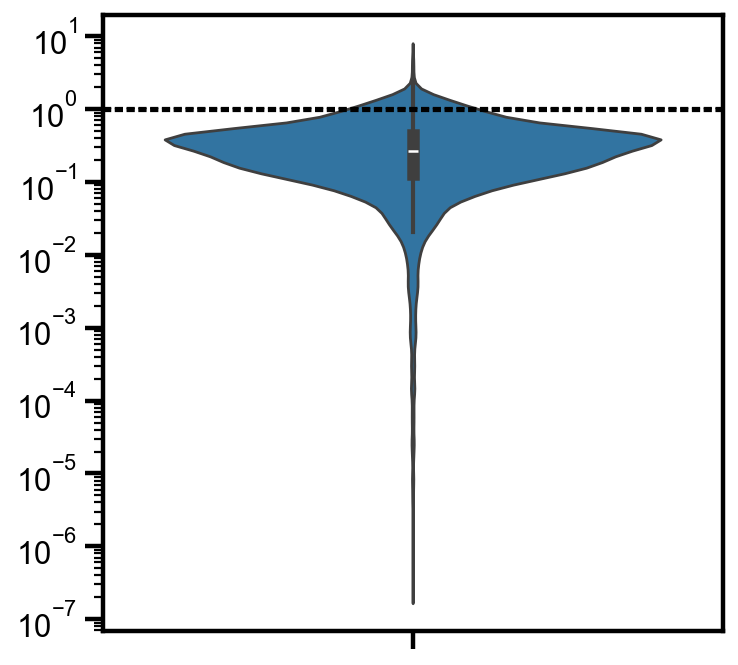

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_yscale('log')
sns.violinplot(
    lie_factor_df,
    ax=ax,
)
ax.axhline(1, color='k', ls='--', lw=1)
ax.axhline(1.05, color='k', ls='--', lw=1)
ax.axhline(0.95, color='k', ls='--', lw=1)

<Axes: ylabel='Count'>

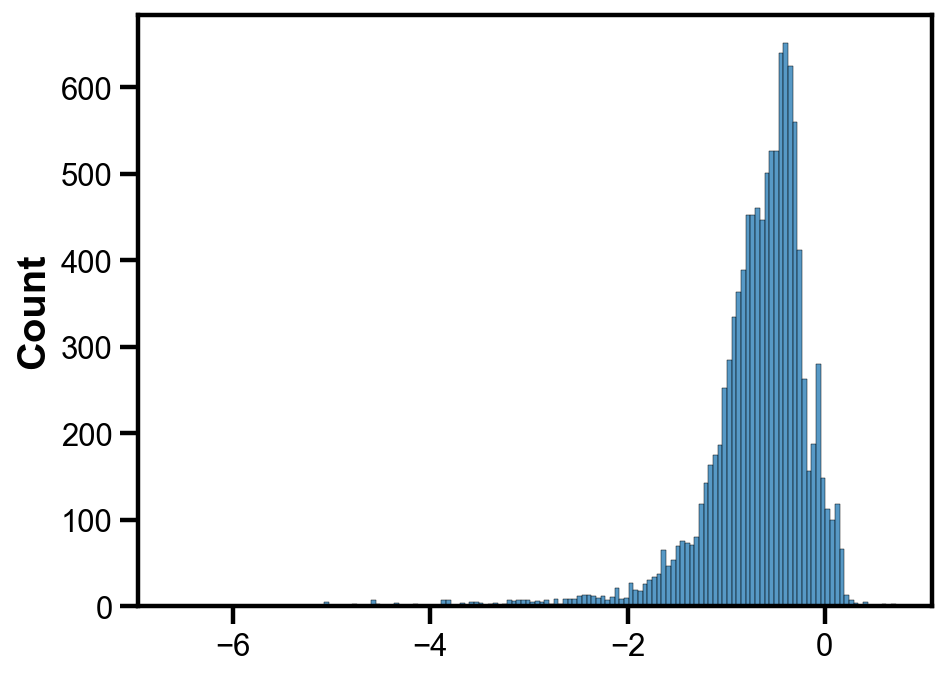

In [26]:
sns.histplot(np.log10(lie_factor_df))

### Original Zero

In [27]:
filepath = os.path.join(DATA_DIR, MISUSED_BAR_DIR, 'nat_biomed_eng', ZERO_SUBDIR)
filenames = os.listdir(filepath)
filenames = pd.Series(filenames)
filenames = filenames[filenames.str.contains(CSV_FILEEXT) & filenames.str.contains(VAL_LABEL)]
filenames = filenames.reset_index(drop=True)
fignames = filenames.str.slice(stop=-8)
filepaths = filepath + os.sep + filenames

In [28]:
raw_df_dict = {}
for i, filepath in enumerate(filepaths):
    val_df = pd.read_csv(filepath, header=None, index_col=0)
    val_df = val_df.reset_index(drop=True)
    val_series = val_df.iloc[:, 0]
    val_series.name = 'Data Value'
    val_effect_series = get_size_of_effect(val_series)
    raw_df_dict[fignames[i]] = val_effect_series

In [29]:
val_series = pd.concat(raw_df_dict)
val_series

10.1038:s41551-023-01136-9_zero_fig11  0    0.170132
                                       1   -0.145396
10.1038:s41551-023-01106-1_zero_fig6   0    0.220447
                                       1   -0.180628
10.1038:s41551-023-01134-x_zero_fig4   0    0.730263
                                              ...   
10.1038:s41551-023-01106-1_zero_fig11  1    0.113815
                                       2   -0.027159
                                       3    0.083565
                                       4   -0.102185
                                       5   -0.077121
Length: 2532, dtype: float64

In [30]:
filepath = os.path.join(DATA_DIR, MISUSED_BAR_DIR, 'nat_biomed_eng', ZERO_SUBDIR)
filenames = os.listdir(filepath)
filenames = pd.Series(filenames)
filenames = filenames[filenames.str.contains(CSV_FILEEXT) & filenames.str.contains(VIZ_LABEL)]
filenames = filenames.reset_index(drop=True)
fignames = filenames.str.slice(stop=-8)
filepaths = filepath + os.sep + filenames

In [31]:
raw_df_dict = {}
for i, filepath in enumerate(filepaths):
    viz_df = pd.read_csv(filepath, header=None, index_col=0)
    viz_df = viz_df.reset_index(drop=True)
    viz_series = viz_df.iloc[:, 0]
    viz_series.name = 'Data Value'
    viz_effect_series = get_size_of_effect(viz_series)
    raw_df_dict[fignames[i]] = viz_effect_series

In [32]:
viz_series = pd.concat(raw_df_dict)
viz_series

10.1038:s41551-023-01113-2_zero_fig1  0    -0.075342
                                      1    -0.150685
                                      2    -0.174658
                                      3     0.081481
                                      4    -0.081481
                                              ...   
10.1038:s41551-023-01138-7_zero_fig1  25    4.360000
                                      26    2.253333
                                      27    3.186667
                                      28    0.800000
                                      29    1.373333
Length: 2532, dtype: float64

In [33]:
lie_factor_df = get_lie_factor(viz_series, val_series)
lie_factor_df

10.1038:s41551-022-00991-2_zero_fig1  0    3.573529
                                      1    3.573529
                                      2    3.573529
                                      3    3.560976
                                      4    3.560976
                                             ...   
10.1038_s41551-023-01136-9_zero_fig7  1    1.439394
                                      2    1.972067
                                      3    1.972067
                                      4    1.480663
                                      5    1.480663
Length: 2532, dtype: float64

In [34]:
# sanity check: no negative lie factor unless manually identified (e.g. negative value represented by positive bars)
# allowed: 10.1038:s41551-023-01138-7_zero_fig1
# figures with negative lie factor
np.unique(lie_factor_df[lie_factor_df < 0].index.get_level_values(0))

array(['10.1038:s41551-023-01138-7_zero_fig1'], dtype=object)

In [35]:
lie_factor_df.min()

-0.026666666666666467

In [36]:
lie_factor_df.max()

34.46058091286281

In [37]:
lie_factor_df.median()

2.199608610567514

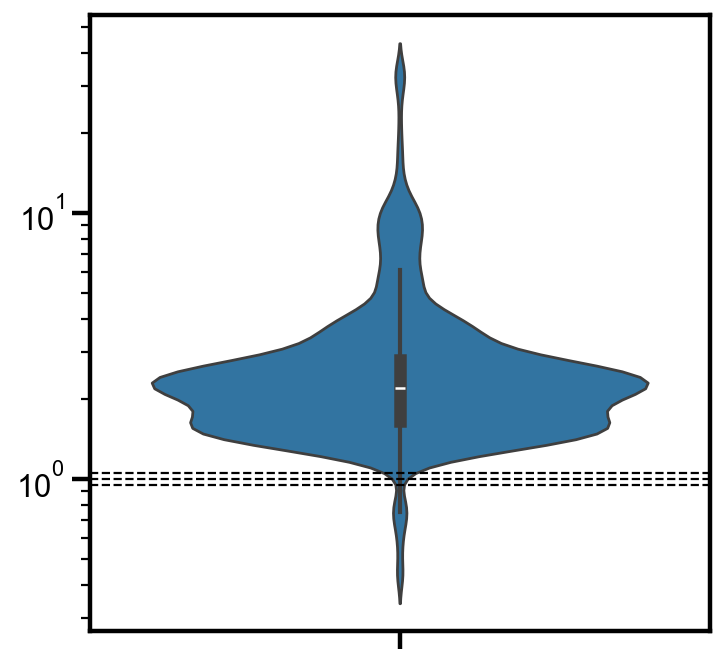

In [38]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_yscale('log')
sns.violinplot(
    lie_factor_df[lie_factor_df > 0],
    ax=ax,
)
ax.axhline(1, color='k', ls='--', lw=1)
ax.axhline(1.05, color='k', ls='--', lw=1)
ax.axhline(0.95, color='k', ls='--', lw=1)

<Axes: ylabel='Count'>

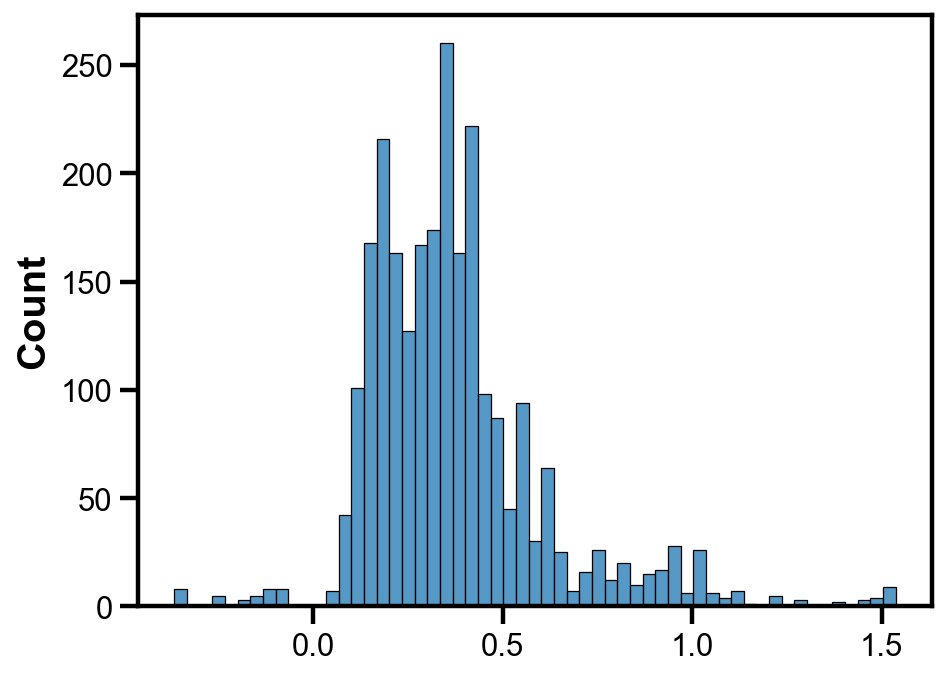

In [39]:
sns.histplot(np.log10(lie_factor_df))

## Lie factor of fold change

### Log

In [37]:
def get_size_of_effect_fc(series):
    # get permutations of all items as 2d array
    comb_arr = itertools.permutations(series, 2)
    comb_arr = np.array(list(comb_arr))
    # calculate size of effect for each permutation as series
    effect = comb_arr[:, 1] / comb_arr[:, 0]
    effect = pd.Series(effect)
    return effect


def _get_lie_factor_fc(viz_series, val_series):
    return get_size_of_effect(viz_series) / get_size_of_effect(val_series)


def get_lie_factor_fc(viz_series, val_series):
    return viz_series / val_series

In [38]:
filepath = os.path.join(DATA_DIR, MISUSED_BAR_DIR, 'nat_biomed_eng', LOG_SUBDIR)
filenames = os.listdir(filepath)
filenames = pd.Series(filenames)
filenames = filenames[filenames.str.contains(CSV_FILEEXT) & filenames.str.contains(VAL_LABEL)]
filenames = filenames.reset_index(drop=True)
fignames = filenames.str.slice(stop=-8)
filepaths = filepath + os.sep + filenames

In [39]:
raw_df_dict = {}
for i, filepath in enumerate(filepaths):
    val_df = pd.read_csv(filepath, header=None, index_col=0)
    val_df = val_df.reset_index(drop=True)
    val_series = val_df.iloc[:, 0]
    val_series.name = 'Data Value'
    val_effect_series = get_size_of_effect_fc(val_series)
    raw_df_dict[fignames[i]] = val_effect_series

In [40]:
val_series = pd.concat(raw_df_dict)
val_series

10.1038:s41551-023-01143-w_log_fig4  0      0.895647
                                     1      2.095885
                                     2      1.099071
                                     3      0.802183
                                     4      0.297512
                                              ...   
10.1038:s41551-023-01143-w_log_fig1  235    0.040274
                                     236    0.384838
                                     237    0.380095
                                     238    0.004952
                                     239    1.132035
Length: 11296, dtype: float64

In [41]:
filepath = os.path.join(DATA_DIR, MISUSED_BAR_DIR, 'nat_biomed_eng', LOG_SUBDIR)
filenames = os.listdir(filepath)
filenames = pd.Series(filenames)
filenames = filenames[filenames.str.contains(CSV_FILEEXT) & filenames.str.contains(VIZ_LABEL)]
filenames = filenames.reset_index(drop=True)
fignames = filenames.str.slice(stop=-8)
filepaths = filepath + os.sep + filenames

In [42]:
raw_df_dict = {}
for i, filepath in enumerate(filepaths):
    viz_df = pd.read_csv(filepath, header=None, index_col=0)
    viz_df = viz_df.reset_index(drop=True)
    viz_series = viz_df.iloc[:, 0]
    viz_series.name = 'Data Value'
    viz_effect_series = get_size_of_effect_fc(viz_series)
    raw_df_dict[fignames[i]] = viz_effect_series

In [43]:
viz_series = pd.concat(raw_df_dict)
viz_series

10.1038:s41551-023-01069-3_log_fig1  0    1.400000
                                     1    0.720000
                                     2    1.232000
                                     3    1.648000
                                     4    3.176000
                                            ...   
10.1038:s41551-023-01134-x_log_fig1  1    1.218354
                                     2    0.957576
                                     3    1.166667
                                     4    0.820779
                                     5    0.857143
Length: 11296, dtype: float64

In [44]:
val_series[viz_series.index.get_level_values(0) == '10.1038:s41551-023-01146-7_log_fig2']

10.1038:s41551-023-01143-w_log_fig1  216    0.054236
                                     217    0.028108
                                     218    0.008981
                                     219    0.070371
                                     220    0.035577
                                     221    0.339953
                                     222    0.335763
                                     223    0.004375
                                     224    0.883365
                                     225    0.544611
                                     226    0.311685
                                     227    0.228595
dtype: float64

In [45]:
viz_series[viz_series.index.get_level_values(0) == '10.1038:s41551-023-01146-7_log_fig2']

10.1038:s41551-023-01146-7_log_fig2  0     1.016461
                                     1     0.555556
                                     2     0.901235
                                     3     0.983806
                                     4     0.546559
                                     5     0.886640
                                     6     1.800000
                                     7     1.829630
                                     8     1.622222
                                     9     1.109589
                                     10    1.127854
                                     11    0.616438
dtype: float64

In [46]:
lie_factor_df = get_lie_factor(viz_series, val_series)
lie_factor_df

10.1038:s41551-022-01001-1_log_fig1  0      1.023673
                                     1      0.981736
                                     2      1.047237
                                     3      1.019577
                                     4      1.044258
                                             ...    
10.1038:s41551-023-01146-7_log_fig2  7      0.014206
                                     8      0.042432
                                     9      0.391781
                                     10     0.334796
                                     11    23.567159
Length: 11296, dtype: float64

In [47]:
lie_factor_df.min()

3.2492857333202055e-07

In [48]:
lie_factor_df.max()

3077599.454382775

In [49]:
lie_factor_df.median()

1.0

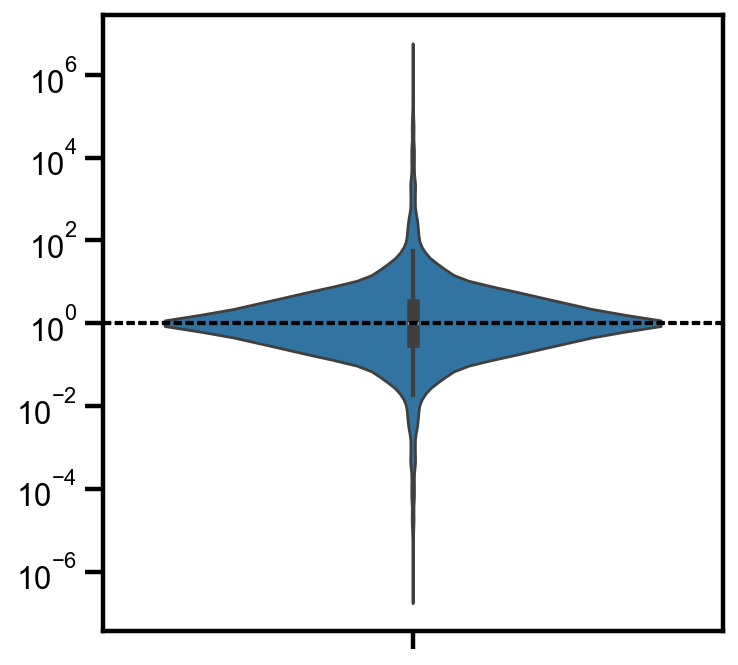

In [50]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_yscale('log')
sns.violinplot(
    lie_factor_df[lie_factor_df > 0],
    ax=ax,
)
ax.axhline(1, color='k', ls='--', lw=1)
ax.axhline(1.05, color='k', ls='--', lw=1)
ax.axhline(0.95, color='k', ls='--', lw=1)

### Zero

In [54]:
filepath = os.path.join(DATA_DIR, MISUSED_BAR_DIR, 'nat_biomed_eng', ZERO_SUBDIR)
filenames = os.listdir(filepath)
filenames = pd.Series(filenames)
filenames = filenames[filenames.str.contains(CSV_FILEEXT) & filenames.str.contains(VAL_LABEL)]
filenames = filenames.reset_index(drop=True)
fignames = filenames.str.slice(stop=-8)
filepaths = filepath + os.sep + filenames

In [55]:
raw_df_dict = {}
for i, filepath in enumerate(filepaths):
    val_df = pd.read_csv(filepath, header=None, index_col=0)
    val_df = val_df.reset_index(drop=True)
    val_series = val_df.iloc[:, 0]
    val_series.name = 'Data Value'
    val_effect_series = get_size_of_effect_fc(val_series)
    raw_df_dict[fignames[i]] = val_effect_series

In [56]:
val_series = pd.concat(raw_df_dict)
val_series

10.1038:s41551-023-01136-9_zero_fig11  0    1.170132
                                       1    0.854604
10.1038:s41551-023-01106-1_zero_fig6   0    1.220447
                                       1    0.819372
10.1038:s41551-023-01134-x_zero_fig4   0    1.730263
                                              ...   
10.1038:s41551-023-01106-1_zero_fig11  1    1.113815
                                       2    0.972841
                                       3    1.083565
                                       4    0.897815
                                       5    0.922879
Length: 2532, dtype: float64

In [57]:
filepath = os.path.join(DATA_DIR, MISUSED_BAR_DIR, 'nat_biomed_eng', ZERO_SUBDIR)
filenames = os.listdir(filepath)
filenames = pd.Series(filenames)
filenames = filenames[filenames.str.contains(CSV_FILEEXT) & filenames.str.contains(VIZ_LABEL)]
filenames = filenames.reset_index(drop=True)
fignames = filenames.str.slice(stop=-8)
filepaths = filepath + os.sep + filenames

In [58]:
raw_df_dict = {}
for i, filepath in enumerate(filepaths):
    viz_df = pd.read_csv(filepath, header=None, index_col=0)
    viz_df = viz_df.reset_index(drop=True)
    viz_series = viz_df.iloc[:, 0]
    viz_series.name = 'Data Value'
    viz_effect_series = get_size_of_effect_fc(viz_series)
    raw_df_dict[fignames[i]] = viz_effect_series

In [59]:
viz_series = pd.concat(raw_df_dict)
viz_series

10.1038:s41551-023-01113-2_zero_fig1  0     0.924658
                                      1     0.849315
                                      2     0.825342
                                      3     1.081481
                                      4     0.918519
                                              ...   
10.1038:s41551-023-01138-7_zero_fig1  25    5.360000
                                      26    3.253333
                                      27    4.186667
                                      28    1.800000
                                      29    2.373333
Length: 2532, dtype: float64

In [60]:
lie_factor_df = get_lie_factor(viz_series, val_series)
lie_factor_df

10.1038:s41551-022-00991-2_zero_fig1  0    1.003525
                                      1    0.986990
                                      2    0.537764
                                      3    0.996487
                                      4    0.983523
                                             ...   
10.1038_s41551-023-01136-9_zero_fig7  1    0.972128
                                      2    1.370068
                                      3    1.331881
                                      4    1.028671
                                      5    0.750818
Length: 2532, dtype: float64

In [61]:
# sanity check: no negative lie factor unless manually identified (e.g. negative value represented by positive bars)
# allowed: 10.1038:s41551-023-01138-7_zero_fig1
# figures with negative lie factor
np.unique(lie_factor_df[lie_factor_df < 0].index.get_level_values(0))

array(['10.1038:s41551-023-01138-7_zero_fig1'], dtype=object)

In [62]:
lie_factor_df.min()

-30.317164179104715

In [63]:
lie_factor_df.max()

6.599130090945028

In [64]:
lie_factor_df.median()

0.9997551995613175

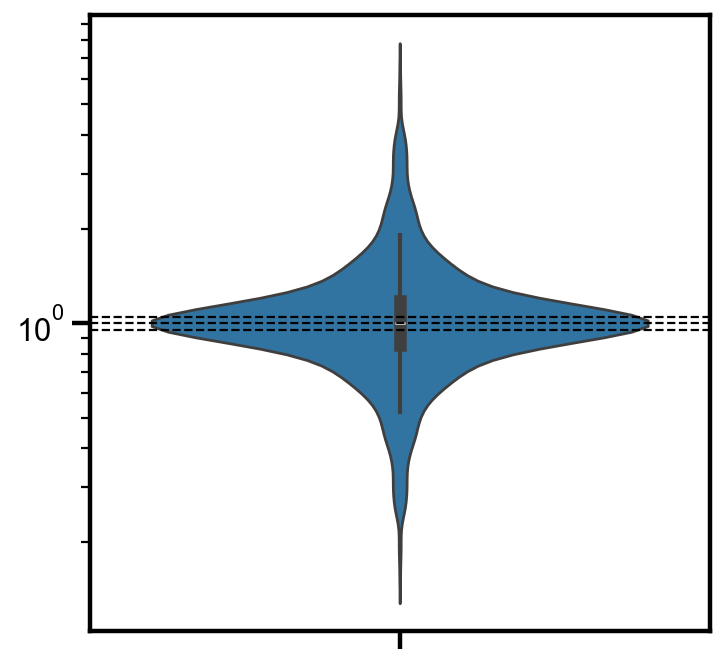

In [65]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_yscale('log')
sns.violinplot(
    lie_factor_df[lie_factor_df > 0],
    ax=ax,
)
ax.axhline(1, color='k', ls='--', lw=1)
ax.axhline(1.05, color='k', ls='--', lw=1)
ax.axhline(0.95, color='k', ls='--', lw=1)